# Analysis of questionnaire data
## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel (r'FinalDataQuestionnaire.xlsx')

In [2]:
All_tasks_dictionary= {'Info_PhoneSeekInfo': "Phone someone to seek information",
                      'Info_ElectronicMedia':"Seek information through electronic media",
                      'Info_ConversationsNearbySeekInfo': "Seek information trough conversations with other people nearby",
                      'info_ScanEnvironment': "Look around and see what is happening",
                      'Info_StaffSeekInfo': "Seek information through a member of staff",
                       'Info_staffSeekInfo': "Seek information through a member of staff",
                      'info_OtherLocationSeekInfo': "Move to another location to seek information",
                      'Info_PhoneProvideInfo': "Phone someone to provide information",
                      'Info_ProvideInstructionsNearby': "Actively provide information to others nearby",
                     'Info_ProvideInstructionsActiveSearch': "Actively search for others in the building to provide information",
                       'Action_ShutDownWorkstation': "Work-related duties",
                      'Action_PackItems': "Pack personal and work items in close vicinity",
                      'Action_Coat': "Collect and put on coat",
                      'Action_FootwearGlassesClothing': "Change footwear/ glasses / clothing",
                      'Action_PhysicallyAssist': "Physically assist others",
                      'Action_EmergencyEquipment': "Collect emergency equipment",
                      'FightFire': "Fight the fire",
                       'CallAlarmNumber': "Call alarm number"}

cols = ['Sequence_Fire_Info_PhoneSeekInfo', 'Sequence_Fire_Info_ElectronicMedia', 'Sequence_Fire_Info_ConversationsNearbySeekInfo', 
           'Sequence_Fire_info_ScanEnvironment', 'Sequence_Fire_Info_StaffSeekInfo', 'Sequence_Fire_info_OtherLocationSeekInfo\t',
            'Sequence_Fire_Info_PhoneProvideInfo', 'Sequence_Fire_Info_ProvideInstructionsNearby', 'Sequence_Fire_Info_ProvideInstructionsActiveSearch',
           'Sequence_Fire_Action_ShutDownWorkstation', 'Sequence_Fire_Action_PackItems', 'Sequence_Fire_Action_Coat', 'Sequence_Fire_Action_FootwearGlassesClothing',
           'Sequence_Fire_Action_PhysicallyAssist', 'Sequence_Fire_Action_EmergencyEquipment']
df[cols] = df[cols].replace({0.0:np.nan})

In [3]:
df_cz= df[df.Nationality == "Czech"]
df_pl= df[df.Nationality == "Polish"]
df_tu= df[df.Nationality == "Turkish"]
df_uk= df[df.Nationality == "UK"]
df_cz.reset_index(drop=True, inplace=True) #Redo index
df_pl.reset_index(drop=True, inplace=True)
df_tu.reset_index(drop=True, inplace=True)
df_uk.reset_index(drop=True, inplace=True)


## Number of tasks performed

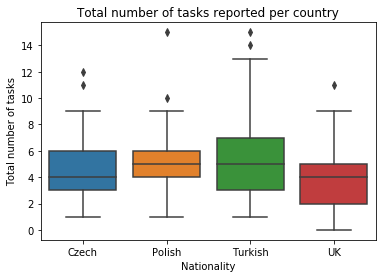

In [4]:
# total number tasks per country in basic scenario


alltasks_boxplot = sns.boxplot(x="Nationality", y="#BasicTotal", data=df, order = ["Czech", "Polish", "Turkish", "UK"])
alltasks_boxplot.set( ylabel="Total number of tasks")
plt.title('Total number of tasks reported per country')


#plt.savefig("Totaltasks.png", dpi=300)


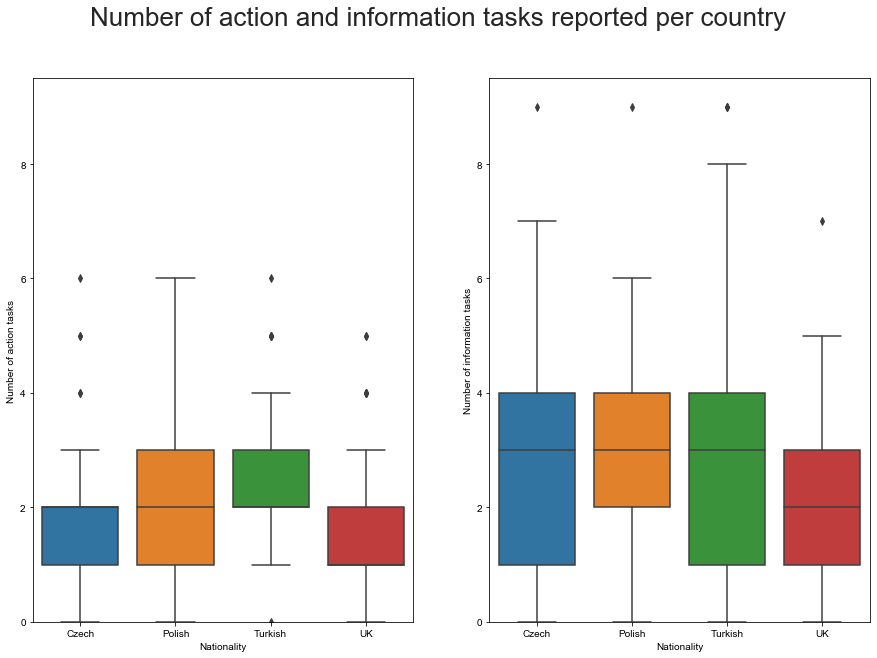

In [5]:
# Number of information and action tasks in basic scenario
sns.set_palette("tab10")
fig, axs = plt.subplots(1, 2, figsize=(15, 10), sharey=False)
sns.set(font_scale=2)

actiontasks_boxplot = sns.boxplot(x="Nationality", y="#BasicAT", data=df, order = ["Czech", "Polish", "Turkish", "UK"], ax=axs[0], palette=sns.color_palette('tab10'))
informationtasks_boxplot = sns.boxplot(x="Nationality", y="#BasicIT", data=df, order = ["Czech", "Polish", "Turkish", "UK"], ax=axs[1], palette=sns.color_palette('tab10'))

informationtasks_boxplot.set_ylim([0, 9.5])
actiontasks_boxplot.set_ylim([0, 9.5])
actiontasks_boxplot.set( ylabel="Number of action tasks")
actiontasks_boxplot.set_facecolor("white")
informationtasks_boxplot.set( ylabel="Number of information tasks")
informationtasks_boxplot.set_facecolor("white")
plt.suptitle("Number of action and information tasks reported per country", size=26)

#plt.savefig("InfoactionTasks.png", dpi=300)


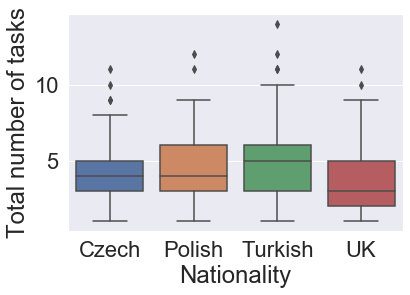

In [6]:
# total number tasks per country in staff scenario

alltasksstaff_boxplot = sns.boxplot(x="Nationality", y="#StaffTotal", data=df, order = ["Czech", "Polish", "Turkish", "UK"])
alltasksstaff_boxplot.set( ylabel="Total number of tasks")
plt.show()

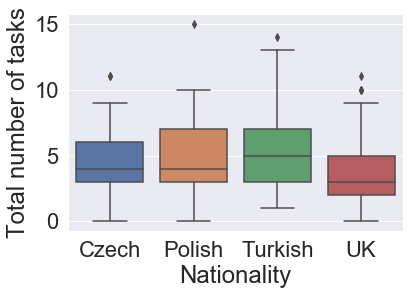

In [7]:
# total number tasks per country in fire scenario

alltasksstaff_boxplot = sns.boxplot(x="Nationality", y="#FireTotal", data=df, order = ["Czech", "Polish", "Turkish", "UK"])
alltasksstaff_boxplot.set( ylabel="Total number of tasks")
plt.show()

## Chances of doing tasks
### Data preparation

In [8]:
##BASIC chances of doing tasks

Basic_dataframe = pd.DataFrame(columns=['TaskType', 'Scenario',  'Czech_Frequency', 'Czech_Percentage', 'Poland_Frequency', 'Poland_Percentage', 'Turkey_Frequency', 
                              'Turkey_Percentage','UK_Frequency', 'UK_Percentage'])

All_tasks= [ 'Basic_Info_PhoneSeekInfo', 'Basic_Info_ElectronicMedia', 'Basic_Info_ConversationsNearbySeekInfo',
           'Basic_info_OtherLocationSeekInfo', 'Basic_info_ScanEnvironment',
            'Basic_Info_StaffSeekInfo', 'Basic_Info_PhoneProvideInfo', 'Basic_Info_ProvideInstructionsNearby',
           'Basic_Info_ProvideInstructionsActiveSearch', 'Basic_Action_ShutDownWorkstation', 'Basic_Action_PackItems',
           'Basic_Action_Coat', 'Basic_Action_FootwearGlassesClothing', 'Basic_Action_PhysicallyAssist',
           'Basic_Action_EmergencyEquipment']
Tasks_Dictionary_Basic = {'Basic_Info_PhoneSeekInfo' : 'Info_PhoneSeekInfo', 'Basic_Info_ElectronicMedia': 'Info_ElectronicMedia', 'Basic_Info_ConversationsNearbySeekInfo': 'Info_ConversationsNearbySeekInfo', 
           'Basic_info_ScanEnvironment': 'info_ScanEnvironment', 'Basic_Info_StaffSeekInfo': 'Info_StaffSeekInfo', 'Basic_info_OtherLocationSeekInfo': 'info_OtherLocationSeekInfo',
            'Basic_Info_PhoneProvideInfo': 'Info_PhoneProvideInfo', 'Basic_Info_ProvideInstructionsNearby': 'Info_ProvideInstructionsNearby',
                    'Basic_Info_ProvideInstructionsActiveSearch': 'Info_ProvideInstructionsActiveSearch',
           'Basic_Action_ShutDownWorkstation': 'Action_ShutDownWorkstation', 'Basic_Action_PackItems': 'Action_PackItems', 'Basic_Action_Coat': 'Action_Coat',
                    'Basic_Action_FootwearGlassesClothing': 'Action_FootwearGlassesClothing','Basic_Action_PhysicallyAssist': 'Action_PhysicallyAssist',
                    'Basic_Action_EmergencyEquipment': 'Action_EmergencyEquipment'}

Basic_dataframe2 = pd.DataFrame(columns=['TaskType', 'Scenario', 'Nationality', 'Frequency', 'Percentage'])

All_Datasets= [df_cz, df_pl, df_tu, df_uk  ]

for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_tasks:
 
        frequency = y[i].sum()
        percentage = (100*y[i].sum()/105)
        
        
        Basic_dataframe2 = Basic_dataframe2.append({'TaskType': All_tasks_dictionary[Tasks_Dictionary_Basic[i]], 'Nationality': Nationality2, 'Frequency': frequency, 'Percentage': percentage, 'Scenario': 'Basic',}, ignore_index=True)

#writer = pd.ExcelWriter('taskscomparisonscenariobasic.xlsx')
# write dataframe to excel sheet named 'marks'
#Basic_dataframe2.to_excel(writer, 'basic')
# save the excel file
#writer.save()

In [9]:
##STAFF chances of doing tasks

Staff_dataframe = pd.DataFrame(columns=['TaskType', 'Scenario',  'Czech_Frequency', 'Czech_Percentage', 'Poland_Frequency', 'Poland_Percentage', 'Turkey_Frequency', 
                              'Turkey_Percentage','UK_Frequency', 'UK_Percentage'])

All_tasks_Staff= ['Sequence_Staff_Info_PhoneSeekInfo', 'Sequence_Staff_Info_ElectronicMedia', 'Sequence_Staff_Info_ConversationsNearbySeekInfo', 
           'Sequence_Staff_info_ScanEnvironment', 'Sequence_Staff_Info_StaffSeekInfo', 'Sequence_Staff_info_OtherLocationSeekInfo\t',
            'Sequence_Staff_Info_PhoneProvideInfo', 'Sequence_Staff_Info_ProvideInstructionsNearby', 'Sequence_Staff_Info_ProvideInstructionsActiveSearch',
           'Sequence_Staff_Action_ShutDownWorkstation', 'Sequence_Staff_Action_PackItems', 'Sequence_Staff_Action_Coat', 'Sequence_Staff_Action_FootwearGlassesClothing',
           'Sequence_Staff_Action_PhysicallyAssist', 'Sequence_Staff_Action_EmergencyEquipment']

Tasks_Dictionary_Staff = {'Sequence_Staff_Info_PhoneSeekInfo' : 'Info_PhoneSeekInfo', 'Sequence_Staff_Info_ElectronicMedia': 'Info_ElectronicMedia', 'Sequence_Staff_Info_ConversationsNearbySeekInfo': 'Info_ConversationsNearbySeekInfo', 
           'Sequence_Staff_info_ScanEnvironment': 'info_ScanEnvironment', 'Sequence_Staff_Info_StaffSeekInfo': 'Info_StaffSeekInfo', 'Sequence_Staff_info_OtherLocationSeekInfo\t': 'info_OtherLocationSeekInfo',
            'Sequence_Staff_Info_PhoneProvideInfo': 'Info_PhoneProvideInfo', 'Sequence_Staff_Info_ProvideInstructionsNearby': 'Info_ProvideInstructionsNearby',
                    'Sequence_Staff_Info_ProvideInstructionsActiveSearch': 'Info_ProvideInstructionsActiveSearch',
           'Sequence_Staff_Action_ShutDownWorkstation': 'Action_ShutDownWorkstation', 'Sequence_Staff_Action_PackItems': 'Action_PackItems', 'Sequence_Staff_Action_Coat': 'Action_Coat',
                    'Sequence_Staff_Action_FootwearGlassesClothing': 'Action_FootwearGlassesClothing','Sequence_Staff_Action_PhysicallyAssist': 'Action_PhysicallyAssist',
                    'Sequence_Staff_Action_EmergencyEquipment': 'Action_EmergencyEquipment'}

staff_dataframe2 = pd.DataFrame(columns=['TaskType', 'Scenario', 'Nationality', 'Frequency', 'Percentage'])

All_Datasets= [df_cz, df_pl, df_tu, df_uk  ]

for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_tasks_Staff:
 
        frequency = y[i].count()
        percentage= (100*y[i].count()/105)
        
        staff_dataframe2 = staff_dataframe2.append({'TaskType': All_tasks_dictionary[Tasks_Dictionary_Staff[i]], 'Nationality': Nationality2, 'Frequency': frequency, 'Percentage': percentage, 'Scenario': 'Staff',}, ignore_index=True)

#writer = pd.ExcelWriter('taskscomparisonscenariostaff.xlsx')
# write dataframe to excel sheet named 'marks'
#staff_dataframe2.to_excel(writer, 'staff')
# save the excel file
#writer.save()


In [10]:
##Fire chances of doing tasks 

Fire_dataframe = pd.DataFrame(columns=['TaskType', 'Scenario',  'Czech_Frequency', 'Czech_Percentage', 'Poland_Frequency', 'Poland_Percentage', 'Turkey_Frequency', 
                              'Turkey_Percentage','UK_Frequency', 'UK_Percentage'])

All_tasks_Fire= ['Sequence_Fire_Info_PhoneSeekInfo', 'Sequence_Fire_Info_ElectronicMedia', 'Sequence_Fire_Info_ConversationsNearbySeekInfo', 
           'Sequence_Fire_info_ScanEnvironment', 'Sequence_Fire_Info_StaffSeekInfo', 'Sequence_Fire_info_OtherLocationSeekInfo\t',
            'Sequence_Fire_Info_PhoneProvideInfo', 'Sequence_Fire_Info_ProvideInstructionsNearby', 'Sequence_Fire_Info_ProvideInstructionsActiveSearch',
           'Sequence_Fire_Action_ShutDownWorkstation', 'Sequence_Fire_Action_PackItems', 'Sequence_Fire_Action_Coat', 'Sequence_Fire_Action_FootwearGlassesClothing',
           'Sequence_Fire_Action_PhysicallyAssist', 'Sequence_Fire_Action_EmergencyEquipment',  "Sequence_Fire_FightFire", "Sequence_Fire_CallAlarmNumber"]

Tasks_Dictionary_Fire = {'Sequence_Fire_Info_PhoneSeekInfo' : 'Info_PhoneSeekInfo', 'Sequence_Fire_Info_ElectronicMedia': 'Info_ElectronicMedia', 'Sequence_Fire_Info_ConversationsNearbySeekInfo': 'Info_ConversationsNearbySeekInfo', 
           'Sequence_Fire_info_ScanEnvironment': 'info_ScanEnvironment', 'Sequence_Fire_Info_StaffSeekInfo': 'Info_StaffSeekInfo', 'Sequence_Fire_info_OtherLocationSeekInfo\t': 'info_OtherLocationSeekInfo',
            'Sequence_Fire_Info_PhoneProvideInfo': 'Info_PhoneProvideInfo', 'Sequence_Fire_Info_ProvideInstructionsNearby': 'Info_ProvideInstructionsNearby',
                    'Sequence_Fire_Info_ProvideInstructionsActiveSearch': 'Info_ProvideInstructionsActiveSearch',
           'Sequence_Fire_Action_ShutDownWorkstation': 'Action_ShutDownWorkstation', 'Sequence_Fire_Action_PackItems': 'Action_PackItems', 'Sequence_Fire_Action_Coat': 'Action_Coat',
                    'Sequence_Fire_Action_FootwearGlassesClothing': 'Action_FootwearGlassesClothing','Sequence_Fire_Action_PhysicallyAssist': 'Action_PhysicallyAssist',
                    'Sequence_Fire_Action_EmergencyEquipment': 'Action_EmergencyEquipment', "Sequence_Fire_FightFire": 'FightFire', "Sequence_Fire_CallAlarmNumber": 'CallAlarmNumber'}


Fire_dataframe2 = pd.DataFrame(columns=['TaskType', 'Scenario', 'Nationality', 'Frequency', 'Percentage'])

All_Datasets= [df_cz, df_pl, df_tu, df_uk  ]

for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_tasks_Fire:
 
        frequency = y[i].count()
        percentage= (100*y[i].count()/105)

        Fire_dataframe2 = Fire_dataframe2.append({'TaskType': All_tasks_dictionary[Tasks_Dictionary_Fire[i]], 'Nationality': Nationality2, 'Frequency': frequency, 'Percentage': percentage, 'Scenario': 'Fire',}, ignore_index=True)


#writer = pd.ExcelWriter('taskscomparisonscenariofire.xlsx')
# write dataframe to excel sheet named 'marks'
#Fire_dataframe2.to_excel(writer, 'Fire')
# save the excel file
#writer.save()


In [11]:
#ALLdatacombined
result = pd.concat([Basic_dataframe, Staff_dataframe,  Fire_dataframe], ignore_index=True, sort=False)
result2 = pd.concat([Basic_dataframe2, staff_dataframe2,  Fire_dataframe2], ignore_index=True, sort=False)

### Plots

Text(0.5, 0.98, 'Chances of doing tasks in the basic scenario')

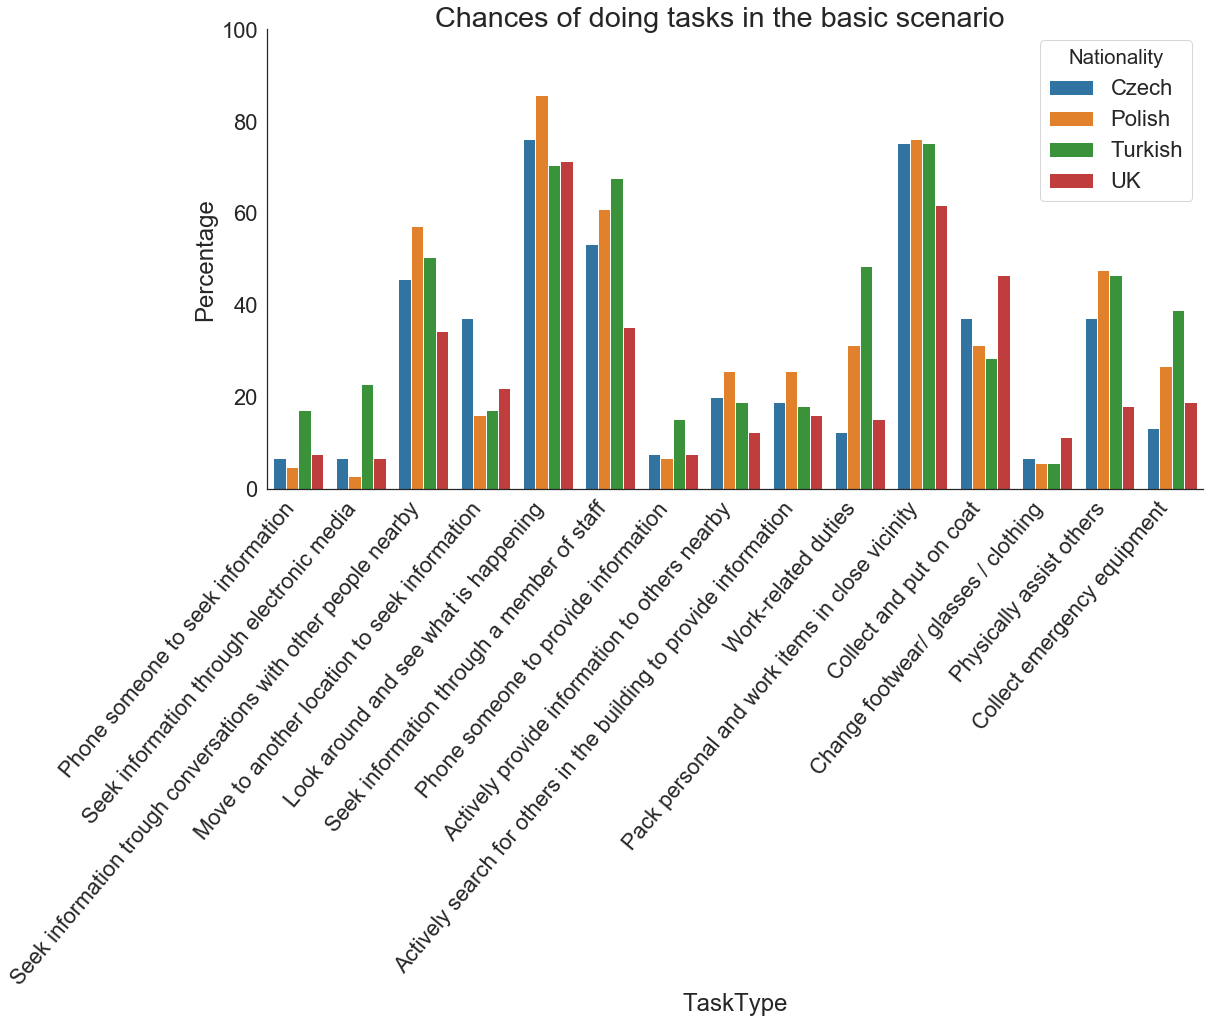

In [12]:
#Basic
resultbasic= result2[result2["Scenario"]== "Basic"]
resultbasic

sns.set(font_scale=2 )
sns.set_palette("tab10")
sns.set_style("white")
#sns.set_palette("bright")
basicplot= sns.catplot(x="TaskType", y="Percentage", hue="Nationality", kind="bar", data=resultbasic, height=8, aspect= 15/7, legend_out=False )
basicplot.set(ylim=(0, 100))
plt.xticks(rotation=50, horizontalalignment='right') #, fontsize='xx-large'
basicplot.fig.suptitle('Chances of doing tasks in the basic scenario')


Text(0.5, 0.98, 'Chances of doing tasks in the fire scenario')

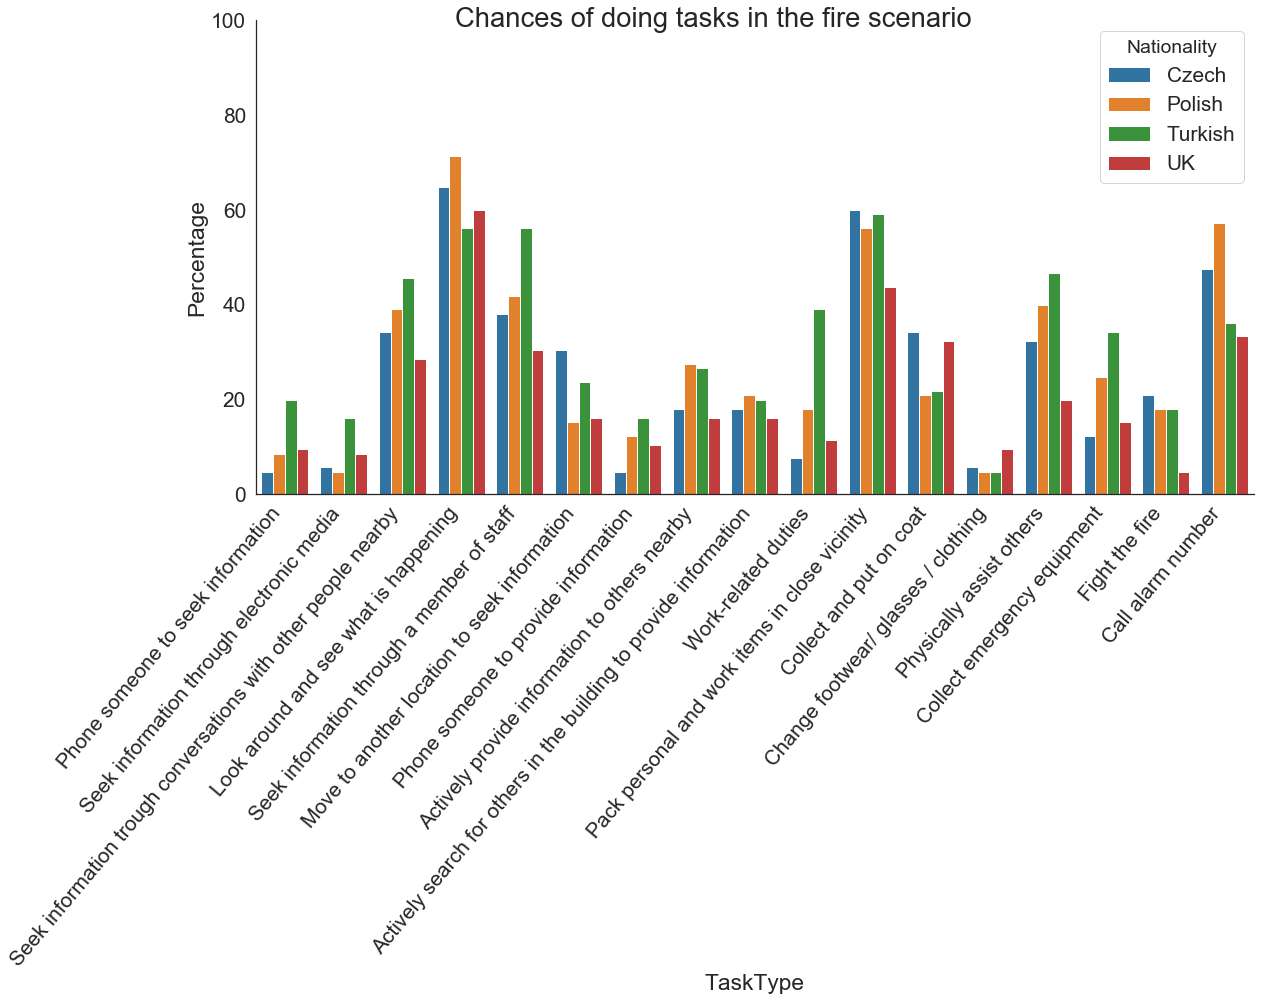

In [13]:
# Fire
resultfire= result2[result2["Scenario"]== "Fire"] 
sns.set(font_scale=1.9, )
sns.set_palette("tab10")
sns.set_style("white")


firecplot= sns.catplot(x="TaskType", y="Percentage", hue="Nationality", kind="bar", data=resultfire, height=8, aspect= 15/7, legend_out=False)

firecplot.set(ylim=(0, 100))
plt.xticks(rotation=50, horizontalalignment='right')
firecplot.fig.suptitle('Chances of doing tasks in the fire scenario')

Text(0.5, 0.98, 'Chances of doing tasks in the informed by staff scenario')

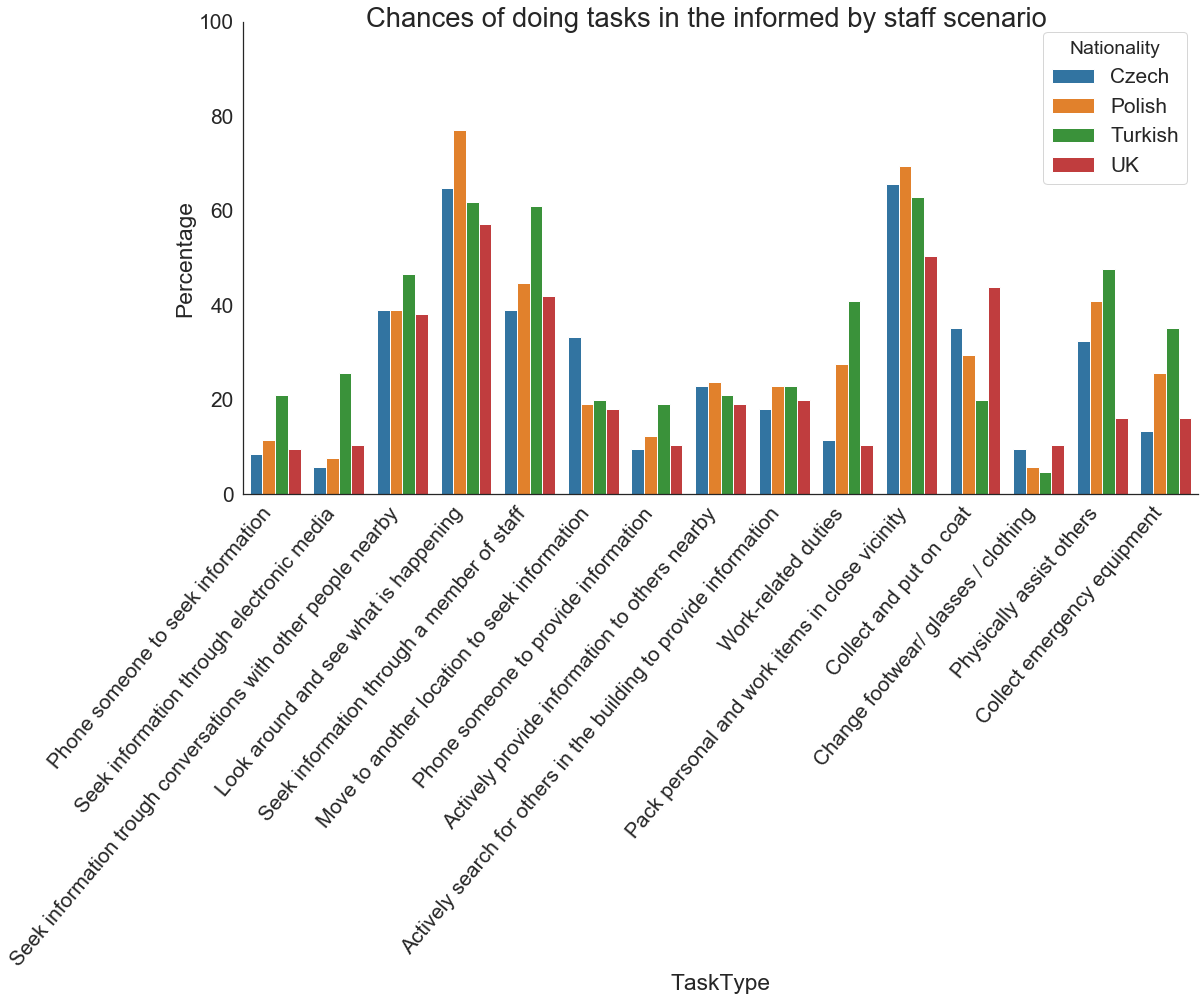

In [14]:
# Staff
resultstaff= result2[result2["Scenario"]== "Staff"]
sns.set(font_scale=1.9, )
sns.set_palette("tab10")
sns.set_style("white")

staffplot= sns.catplot(x="TaskType", y="Percentage", hue="Nationality", kind="bar", data=resultstaff, height=8, aspect= 15/7, legend_out=False )
staffplot.set(ylim=(0, 100))
plt.xticks(rotation=50, horizontalalignment='right')
staffplot.fig.suptitle('Chances of doing tasks in the informed by staff scenario')

## Closed space scenario

In [15]:

# Closed space scenario preparation

array = ['Phone someone to seek information	', 'Seek information through electronic media', "Move to another location to seek information", "Look around and see what is happening",
        "Seek information through a member of staff", "Phone someone to provide information", "Actively search for others in the building to provide information" ]


resultbasic_limitedtasks= resultbasic.loc[resultbasic['TaskType'].isin(array)]

All_task_Closed_Space= [ 'Closed_Space_Info_PhoneSeekInfo', 'Closed_Space_Info_ElectronicMedia ', 
           'Closed_Space_info_OtherLocationSeekInfo', 'Closed_Space_info_ScanEnvironment',
            'Closed_Space_Info_StaffSeekInfo', 'Closed_Space_Info_PhoneProvideInfo', 
           'Closed_Space_Info_ProvideInstructionsActiveSearch']


Tasks_Dictionary_Closed_Space = {'Closed_Space_Info_PhoneSeekInfo' : 'Info_PhoneSeekInfo', 'Closed_Space_Info_ElectronicMedia ': 'Info_ElectronicMedia', 'Closed_Space_Info_ConversationsNearbySeekInfo': 'Info_ConversationsNearbySeekInfo', 
           'Closed_Space_info_ScanEnvironment': 'info_ScanEnvironment', 'Closed_Space_Info_StaffSeekInfo': 'Info_StaffSeekInfo', 'Closed_Space_info_OtherLocationSeekInfo': 'info_OtherLocationSeekInfo',
            'Closed_Space_Info_PhoneProvideInfo': 'Info_PhoneProvideInfo', 'Closed_Space_Info_ProvideInstructionsNearby': 'Info_ProvideInstructionsNearby',
                    'Closed_Space_Info_ProvideInstructionsActiveSearch': 'Info_ProvideInstructionsActiveSearch',
           'Closed_Space_Action_ShutDownWorkstation': 'Action_ShutDownWorkstation', 'Closed_Space_Action_PackItems': 'Action_PackItems', 'Closed_Space_Action_Coat': 'Action_Coat',
                    'Closed_Space_Action_FootwearGlassesClothing': 'Action_FootwearGlassesClothing','Closed_Space_Action_PhysicallyAssist': 'Action_PhysicallyAssist',
                    'Closed_Space_Action_EmergencyEquipment': 'Action_EmergencyEquipment'}


ClosedSpace_dataframe2 = pd.DataFrame(columns=['TaskType', 'Scenario', 'Nationality', 'Frequency', 'Percentage'])
for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_task_Closed_Space:
 
        frequency = y[i].sum()
        percentage = (100*y[i].sum()/105)
        
        
        ClosedSpace_dataframe2 = ClosedSpace_dataframe2.append({'TaskType': All_tasks_dictionary[Tasks_Dictionary_Closed_Space[i]], 'Nationality': Nationality2, 'Frequency': frequency, 'Percentage': percentage, 'Scenario': 'ClosedSpace',}, ignore_index=True)

        ResultbasicResultClosedSpaceCombined = pd.concat([resultbasic_limitedtasks, ClosedSpace_dataframe2], ignore_index=True, sort=False)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

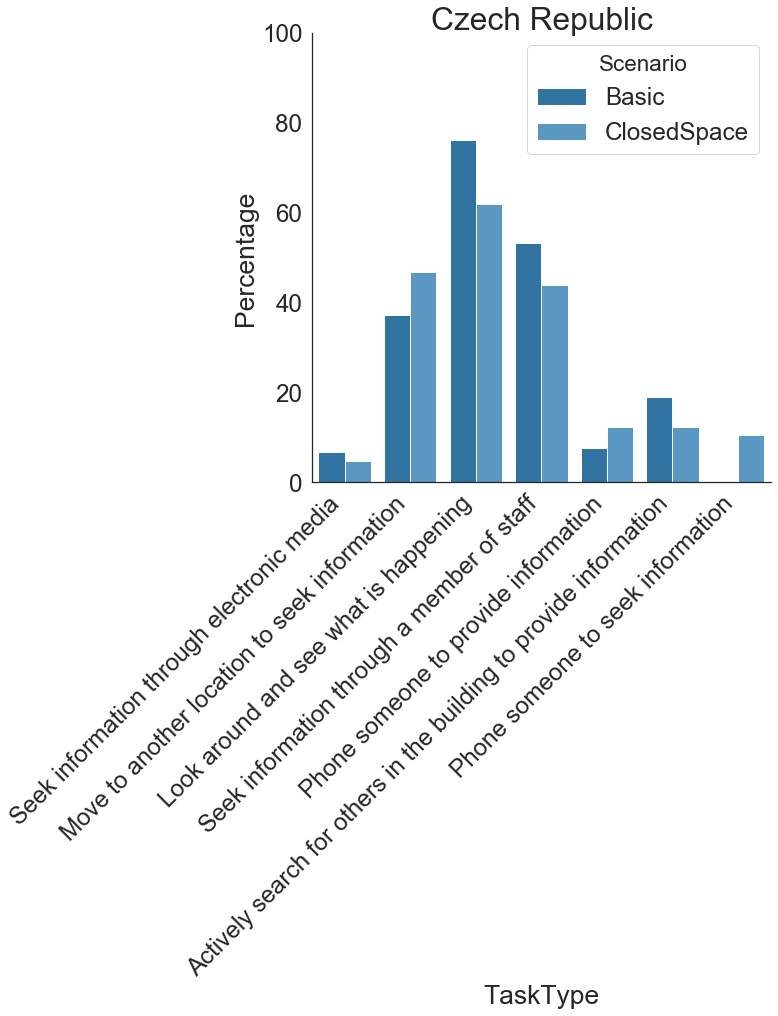

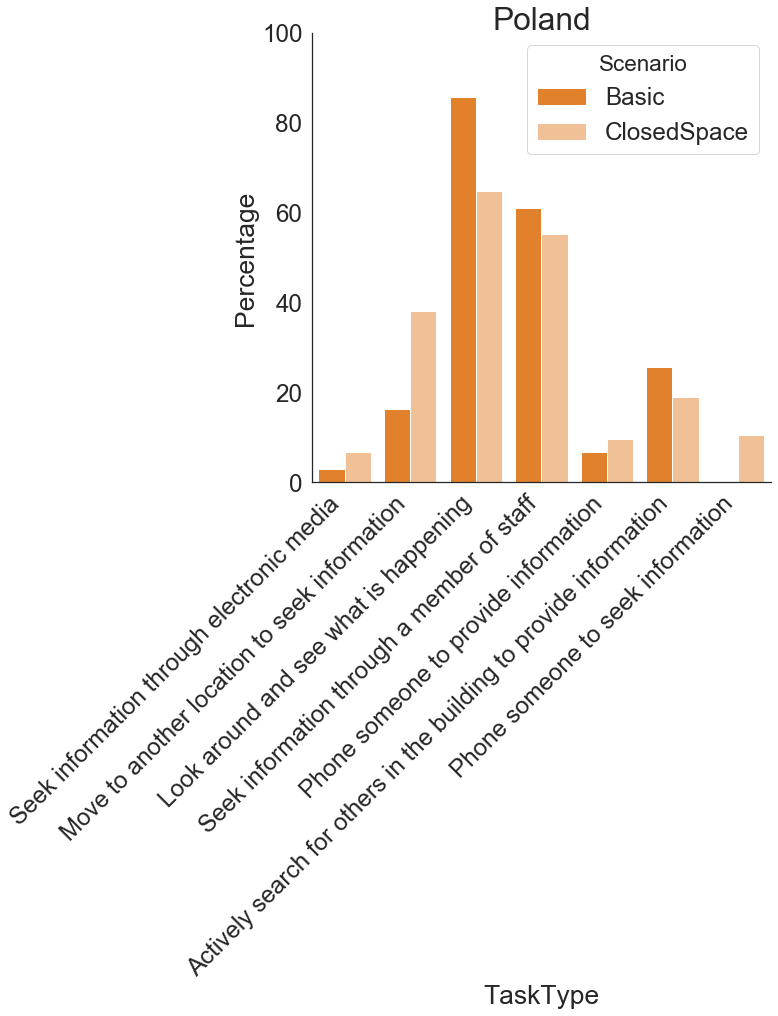

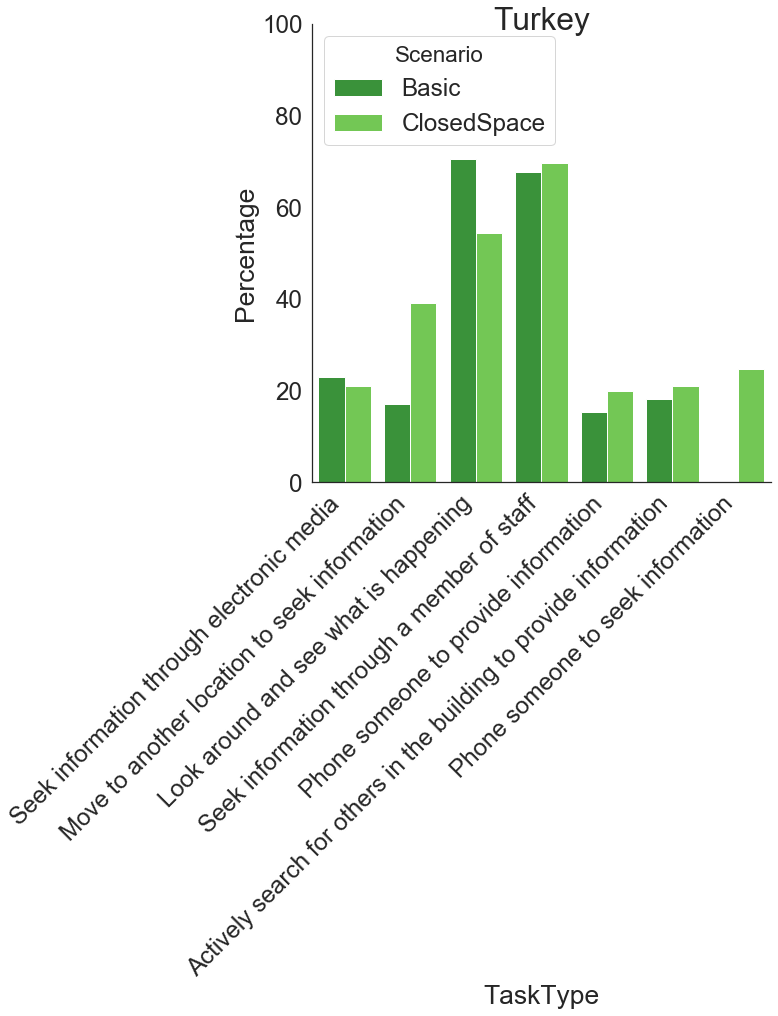

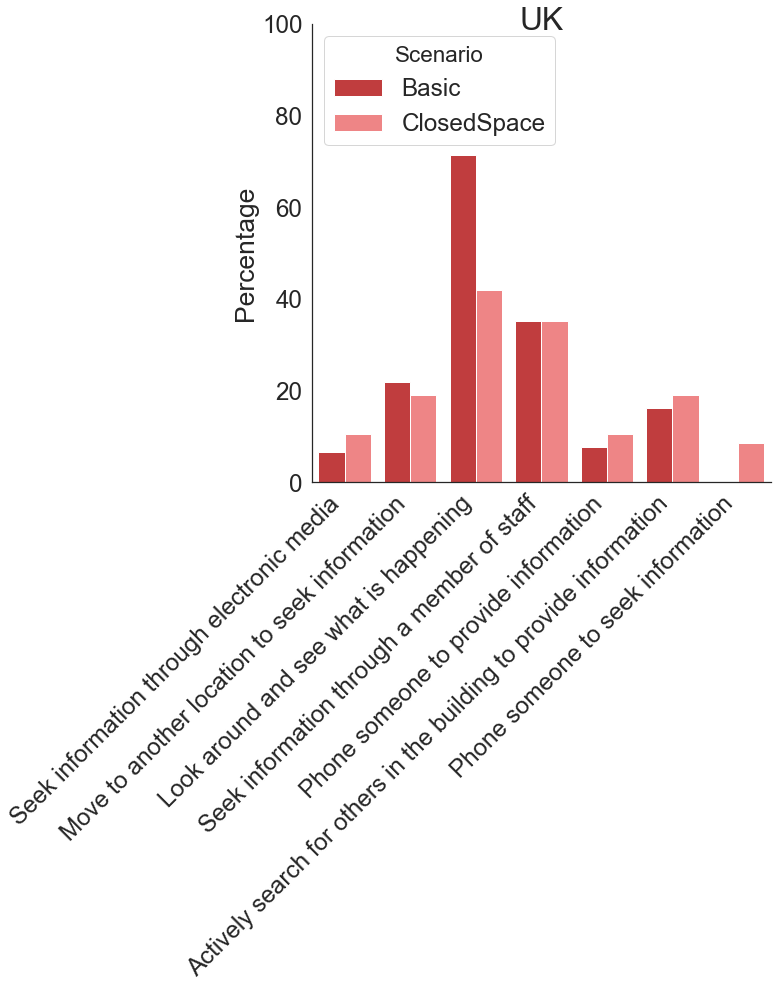

In [16]:
# CombinedClosedSpace

sns.set(font_scale=2.2, )
sns.set_style("white")

Closedspacecombined_Czech= sns.catplot( x="TaskType", y="Percentage", hue="Scenario", kind="bar",
                                       data=ResultbasicResultClosedSpaceCombined[ResultbasicResultClosedSpaceCombined.Nationality=="Czech"], height=8, aspect= 15/10, legend_out=False,
                                       palette=['#1f77b4', '#499BD4'])
Closedspacecombined_Czech.set(ylim=(0, 100))
Closedspacecombined_Czech.fig.suptitle('Czech Republic')
plt.xticks(rotation=45, horizontalalignment='right')

Closedspacecombined_Polish= sns.catplot( x="TaskType", y="Percentage", hue="Scenario", kind="bar",
                                       palette=['#ff7f0e', '#FFC088'], data=ResultbasicResultClosedSpaceCombined[ResultbasicResultClosedSpaceCombined.Nationality=="Polish"], height=8, legend_out=False, aspect= 15/10 )
Closedspacecombined_Polish.set(ylim=(0, 100))
Closedspacecombined_Polish.fig.suptitle('Poland')
plt.xticks(rotation=45, horizontalalignment='right')

Closedspacecombined_Turk= sns.catplot( x="TaskType", y="Percentage", palette=['#2ca02c', '#6ADA42'], hue="Scenario", kind="bar", data=ResultbasicResultClosedSpaceCombined[ResultbasicResultClosedSpaceCombined.Nationality=="Turkish"], height=8, legend_out=False, aspect= 15/10 )
Closedspacecombined_Turk.set(ylim=(0, 100))
Closedspacecombined_Turk.fig.suptitle('Turkey')
plt.xticks(rotation=45, horizontalalignment='right')

Closedspacecombined_UK= sns.catplot( x="TaskType", y="Percentage", hue="Scenario", palette=['#d62728', '#FF7475'], kind="bar", data=ResultbasicResultClosedSpaceCombined[ResultbasicResultClosedSpaceCombined.Nationality=="UK"], height=8, legend_out=False, aspect= 15/10 )
Closedspacecombined_UK.set(ylim=(0, 100))
Closedspacecombined_UK.fig.suptitle('UK')
Closedspacecombined_UK.set(xlabel=None)
plt.xticks(rotation=45, horizontalalignment='right')

Text(0.5, 0.98, 'Chances of doing tasks when in a closed off space')

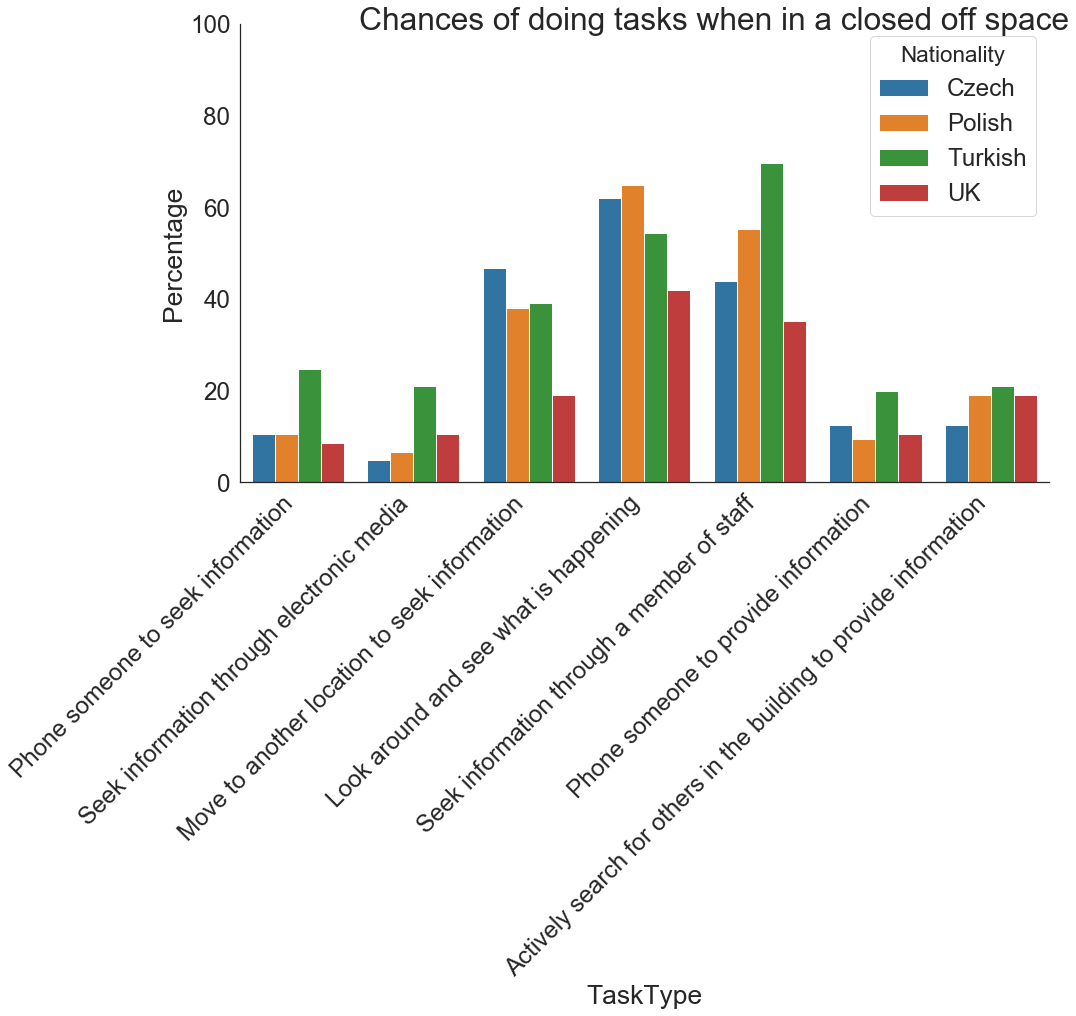

In [17]:
# Closed Space chances of doing tasks
resultclosedspace= result2[result2["Scenario"]== "Closedspace"]
sns.set(font_scale=2.2, )
sns.set_palette("tab10")
sns.set_style("white")

closedspaceplot= sns.catplot(x="TaskType", y="Percentage", hue="Nationality", kind="bar", data=ClosedSpace_dataframe2, height=8, aspect= 15/7, legend_out=False  )
closedspaceplot.set(ylim=(0, 100))
plt.xticks(rotation=45, horizontalalignment='right')
closedspaceplot.fig.suptitle('Chances of doing tasks when in a closed off space')

## Orders of performing tasks

In [18]:
##Staff3 ORDER
staff_dataframe3 = pd.DataFrame(columns=['TaskType', 'Frequency', 'Sequencenumber']) # Dataframe with all counts of sequence order

for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_tasks_Staff:
        for x in range (1,16):
 
            frequency=y[y[i]== x].count()[1]

            staff_dataframe3 = staff_dataframe3.append({'TaskType': Tasks_Dictionary_Staff[i], 'Nationality': Nationality2, 'Frequency': frequency, 'Sequencenumber': x, 'Scenario': 'Staff',}, ignore_index=True)

In [19]:
##Staff3 ORDER
#MostFrequentlyOccuring tasks for each sequence no in Staff Scenario
staff_dataframe3_max = pd.DataFrame(columns=['TaskType', 'Frequency', 'Sequencenumber'])

Nationalities= { "Czech", "UK", "Polish", "Turkish"}
for y in Nationalities:
    for x in range (1,4):
        u=staff_dataframe3[(staff_dataframe3["Sequencenumber"] == x) & (staff_dataframe3["Nationality"] == y)]
        u_max=u[u.Frequency == u.Frequency.max()]
        staff_dataframe3_max= staff_dataframe3_max.append(u_max, ignore_index=True )


staff_dataframe3_max

,TaskType,Frequency,Sequencenumber,Nationality,Scenario
0,info_ScanEnvironment,35,1,UK,Staff
1,Action_PackItems,19,2,UK,Staff
2,Info_StaffSeekInfo,11,3,UK,Staff
3,info_ScanEnvironment,55,1,Polish,Staff
4,Action_PackItems,18,2,Polish,Staff
5,Action_PackItems,19,3,Polish,Staff
6,info_ScanEnvironment,34,1,Turkish,Staff
7,Info_StaffSeekInfo,22,2,Turkish,Staff
8,Info_ConversationsNearbySeekInfo,12,3,Turkish,Staff
9,Action_PhysicallyAssist,12,3,Turkish,Staff


In [20]:
##Fire3 ORDER 
#MostFrequentlyOccuring tasks for each sequence no in Fire Scenario


Fire_dataframe3 = pd.DataFrame(columns=['TaskType', 'Frequency', 'Sequencenumber'])

for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_tasks_Fire:
        for x in range (1,16):
 
            frequency=y[y[i]== x].count()[1]

            Fire_dataframe3 = Fire_dataframe3.append({'TaskType': Tasks_Dictionary_Fire[i], 'Nationality': Nationality2, 'Frequency': frequency, 'Sequencenumber': x, 'Scenario': 'Fire',}, ignore_index=True)



Fire_dataframe3_max = pd.DataFrame(columns=['TaskType', 'Frequency', 'Sequencenumber'])

Nationalities= { "Czech", "UK", "Polish", "Turkish"}
for y in Nationalities:
    for x in range (1,4):
        u=Fire_dataframe3[(Fire_dataframe3["Sequencenumber"] == x) & (Fire_dataframe3["Nationality"] == y)]
        u_max=u[u.Frequency == u.Frequency.max()]
        Fire_dataframe3_max= Fire_dataframe3_max.append(u_max, ignore_index=True )


Fire_dataframe3_max

,TaskType,Frequency,Sequencenumber,Nationality,Scenario
0,info_ScanEnvironment,35,1,UK,Fire
1,info_ScanEnvironment,14,2,UK,Fire
2,Action_Coat,9,3,UK,Fire
3,info_ScanEnvironment,53,1,Polish,Fire
4,CallAlarmNumber,25,2,Polish,Fire
5,Action_PackItems,20,3,Polish,Fire
6,info_ScanEnvironment,32,1,Turkish,Fire
7,Action_PackItems,17,2,Turkish,Fire
8,Info_StaffSeekInfo,15,3,Turkish,Fire
9,info_ScanEnvironment,51,1,Czech,Fire


In [21]:
#Basic3 ORDER First few tasks probability
All_tasks_Basic_order= ['Sequence_Basic_Info_PhoneSeekInfo', 'Sequence_Basic_Info_ElectronicMedia', 'Sequence_Basic_Info_ConversationsNearbySeekInfo', 
           'Sequence_Basic_info_ScanEnvironment', 'Sequence_Basic_Info_StaffSeekInfo', 'Sequence_Basic_info_OtherLocationSeekInfo\t',
            'Sequence_Basic_Info_PhoneProvideInfo', 'Sequence_Basic_Info_ProvideInstructionsNearby', 'Sequence_Basic_Info_ProvideInstructionsActiveSearch',
           'Sequence_Basic_Action_ShutDownWorkstation', 'Sequence_Basic_Action_PackItems', 'Sequence_Basic_Action_Coat', 'Sequence_Basic_Action_FootwearGlassesClothing',
           'Sequence_Basic_Action_PhysicallyAssist', 'Sequence_Basic_Action_EmergencyEquipment']
Tasks_Dictionary_Basic = {'Sequence_Basic_Info_PhoneSeekInfo' : 'Info_PhoneSeekInfo', 'Sequence_Basic_Info_ElectronicMedia': 'Info_ElectronicMedia', 'Sequence_Basic_Info_ConversationsNearbySeekInfo': 'Info_ConversationsNearbySeekInfo', 
           'Sequence_Basic_info_ScanEnvironment': 'info_ScanEnvironment', 'Sequence_Basic_Info_StaffSeekInfo': 'Info_StaffSeekInfo', 'Sequence_Basic_info_OtherLocationSeekInfo\t': 'info_OtherLocationSeekInfo',
            'Sequence_Basic_Info_PhoneProvideInfo': 'Info_PhoneProvideInfo', 'Sequence_Basic_Info_ProvideInstructionsNearby': 'Info_ProvideInstructionsNearby',
                    'Sequence_Basic_Info_ProvideInstructionsActiveSearch': 'Info_ProvideInstructionsActiveSearch',
           'Sequence_Basic_Action_ShutDownWorkstation': 'Action_ShutDownWorkstation', 'Sequence_Basic_Action_PackItems': 'Action_PackItems', 'Sequence_Basic_Action_Coat': 'Action_Coat',
                    'Sequence_Basic_Action_FootwearGlassesClothing': 'Action_FootwearGlassesClothing','Sequence_Basic_Action_PhysicallyAssist': 'Action_PhysicallyAssist',
                    'Sequence_Basic_Action_EmergencyEquipment': 'Action_EmergencyEquipment'}
Basic_dataframe3 = pd.DataFrame(columns=['TaskType', 'Frequency', 'Percentage', 'Sequencenumber'])
for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_tasks_Basic_order:
        for x in range (1,16):
 
            frequency=y[y[i]== x].count()[1]

            Basic_dataframe3 = Basic_dataframe3.append({'TaskType': Tasks_Dictionary_Basic[i], 'Nationality': Nationality2, 'Frequency': frequency, 'Sequencenumber': x, 'Scenario': 'Basic',}, ignore_index=True)

Basic_dataframe3_max = pd.DataFrame(columns=['TaskType', 'Frequency', 'Sequencenumber'])

Nationalities= { "Czech", "UK", "Polish", "Turkish"}
for y in Nationalities:
    for x in range (1,6):
        u=Basic_dataframe3[(Basic_dataframe3["Sequencenumber"] == x) & (Basic_dataframe3["Nationality"] == y)]
        u_max=u[u.Frequency == u.Frequency.max()]
        Basic_dataframe3_max= Basic_dataframe3_max.append(u_max, ignore_index=True )


Basic_dataframe3_max

#Basic_dataframe3_max.to_clipboard()


,TaskType,Frequency,Sequencenumber,Percentage,Nationality,Scenario
0,info_ScanEnvironment,53,1,NaN,UK,Basic
1,Action_PackItems,23,2,NaN,UK,Basic
2,Action_PackItems,12,3,NaN,UK,Basic
3,Action_Coat,14,4,NaN,UK,Basic
4,Action_FootwearGlassesClothing,6,5,NaN,UK,Basic
5,info_ScanEnvironment,72,1,NaN,Polish,Basic
6,Info_ConversationsNearbySeekInfo,35,2,NaN,Polish,Basic
7,Info_StaffSeekInfo,25,3,NaN,Polish,Basic
8,Action_PackItems,19,4,NaN,Polish,Basic
9,Action_PhysicallyAssist,16,5,NaN,Polish,Basic


# Task adjustment after informed by staff
## Preparation

In [22]:
## Chance adjustments of tasks after informed by staff


Staff_dataframe_adjust = pd.DataFrame(columns=['TaskType', 'Scenario', 'Frequency_basic', 'Frequency_staff_not','PercentageStaffNot', 'Frequency_staff_yes', 'PercentageStaffyes'   ])

All_tasks= [ 'Basic_Info_PhoneSeekInfo', 'Basic_Info_ElectronicMedia', 'Basic_Info_ConversationsNearbySeekInfo',
           'Basic_info_OtherLocationSeekInfo', 'Basic_info_ScanEnvironment',
            'Basic_Info_StaffSeekInfo', 'Basic_Info_PhoneProvideInfo', 'Basic_Info_ProvideInstructionsNearby', 'Basic_Info_ProvideInstructionsActiveSearch',
            'Basic_Action_ShutDownWorkstation', 'Basic_Action_PackItems',
            'Basic_Action_Coat', 'Basic_Action_FootwearGlassesClothing', 'Basic_Action_PhysicallyAssist',
            'Basic_Action_EmergencyEquipment']

All_tasks_staff_Not= ["Staff_Not_Info_PhoneSeekInfo", "Staff_Not_Info_ElectronicMedia", "Staff_Not_Info_ConversationsNearbySeekInfo",
                      'Staff_Not_info_OtherLocationSeekInfo',"Staff_Not_info_ScanEnvironment",
                     "Staff_Not_Info_StaffSeekInfo","Staff_Not_Info_PhoneProvideInfo", "Staff_Not_Info_ProvideInstructionsNearby",
                      "Staff_Not_Info_ProvideInstructionsActiveSearch", "Staff_Not_Action_ShutDownWorkstation",'Staff_Not_Action_PackItems',
                     "Staff_Not_Action_Coat", "Staff_Not_Action_FootwearGlassesClothing", "Staff_Not_Action_PhysicallyAssist",
                     "Staff_Not_Action_EmergencyEquipment"]

All_tasks_staff_Not_dict= { 'Basic_Info_PhoneSeekInfo':"Staff_Not_Info_PhoneSeekInfo" , 'Basic_Info_ElectronicMedia':"Staff_Not_Info_ElectronicMedia" ,
                           'Basic_Info_ConversationsNearbySeekInfo':"Staff_Not_Info_ConversationsNearbySeekInfo" ,
                           'Basic_info_OtherLocationSeekInfo':'Staff_Not_info_OtherLocationSeekInfo' , 'Basic_info_ScanEnvironment':"Staff_Not_info_ScanEnvironment" ,
                            'Basic_Info_StaffSeekInfo':"Staff_Not_Info_StaffSeekInfo" , 'Basic_Info_PhoneProvideInfo': "Staff_Not_Info_PhoneProvideInfo", 'Basic_Info_ProvideInstructionsNearby':"Staff_Not_Info_ProvideInstructionsNearby" ,
                           'Basic_Info_ProvideInstructionsActiveSearch': "Staff_Not_Info_ProvideInstructionsActiveSearch", 'Basic_Action_ShutDownWorkstation':"Staff_Not_Action_ShutDownWorkstation" , 'Basic_Action_PackItems': 'Staff_Not_Action_PackItems',
                           'Basic_Action_Coat':"Staff_Not_Action_Coat" , 'Basic_Action_FootwearGlassesClothing':"Staff_Not_Action_FootwearGlassesClothing" , 'Basic_Action_PhysicallyAssist':  "Staff_Not_Action_PhysicallyAssist",
                           'Basic_Action_EmergencyEquipment': "Staff_Not_Action_EmergencyEquipment"}

All_tasks_staff_Yes_dict= { 'Basic_Info_PhoneSeekInfo':"Staff_Yes_Info_PhoneSeekInfo" , 'Basic_Info_ElectronicMedia':"Staff_Yes_Info_ElectronicMedia" ,
                           'Basic_Info_ConversationsNearbySeekInfo':"Staff_Yes_Info_ConversationsNearbySeekInfo" ,
                           'Basic_info_OtherLocationSeekInfo':'Staff_Yes_info_OtherLocationSeekInfo' , 'Basic_info_ScanEnvironment':"Staff_Yes_info_ScanEnvironment" ,
                            'Basic_Info_StaffSeekInfo':"Staff_Yes_Info_StaffSeekInfo" , 'Basic_Info_PhoneProvideInfo': "Staff_Yes_Info_PhoneProvideInfo", 'Basic_Info_ProvideInstructionsNearby':"Staff_Yes_Info_ProvideInstructionsNearby" ,
                           'Basic_Info_ProvideInstructionsActiveSearch': "Staff_Yes_Info_ProvideInstructionsActiveSearch", 'Basic_Action_ShutDownWorkstation':"Staff_Yes_Action_ShutDownWorkstation" , 'Basic_Action_PackItems': 'Staff_Yes_Action_PackItems',
                           'Basic_Action_Coat':"Staff_Yes_Action_Coat" , 'Basic_Action_FootwearGlassesClothing':"Staff_Yes_Action_FootwearGlassesClothing" , 'Basic_Action_PhysicallyAssist':  "Staff_Yes_Action_PhysicallyAssist",
                           'Basic_Action_EmergencyEquipment': "Staff_Yes_Action_EmergencyEquipment"}



Tasks_Dictionary_Basic = {'Basic_Info_PhoneSeekInfo' : 'Info_PhoneSeekInfo', 'Basic_Info_ElectronicMedia': 'Info_ElectronicMedia', 'Basic_Info_ConversationsNearbySeekInfo': 'Info_ConversationsNearbySeekInfo', 
           'Basic_info_ScanEnvironment': 'info_ScanEnvironment', 'Basic_Info_StaffSeekInfo': 'Info_StaffSeekInfo', 'Basic_info_OtherLocationSeekInfo': 'info_OtherLocationSeekInfo',
            'Basic_Info_PhoneProvideInfo': 'Info_PhoneProvideInfo', 'Basic_Info_ProvideInstructionsNearby': 'Info_ProvideInstructionsNearby',
                    'Basic_Info_ProvideInstructionsActiveSearch': 'Info_ProvideInstructionsActiveSearch',
           'Basic_Action_ShutDownWorkstation': 'Action_ShutDownWorkstation', 'Basic_Action_PackItems': 'Action_PackItems', 'Basic_Action_Coat': 'Action_Coat',
                    'Basic_Action_FootwearGlassesClothing': 'Action_FootwearGlassesClothing','Basic_Action_PhysicallyAssist': 'Action_PhysicallyAssist',
                    'Basic_Action_EmergencyEquipment': 'Action_EmergencyEquipment'}

All_Datasets= [df_cz, df_pl, df_tu, df_uk  ]

for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_tasks:
 
        frequency_basic = y[i].sum()
        frequency_staff_not = y[All_tasks_staff_Not_dict[i]].sum()
        frequency_staff_yes = y[All_tasks_staff_Yes_dict[i]].sum()
        percentage_staff_not = round (frequency_staff_not / frequency_basic * 100, 2)
        percentage_staff_yes = round (frequency_staff_yes / (105-frequency_basic) * 100, 2)

        
        
        Staff_dataframe_adjust  = Staff_dataframe_adjust.append({'TaskType': All_tasks_dictionary[Tasks_Dictionary_Basic[i]], 'Nationality': Nationality2, 'Frequency_basic': frequency_basic, 'Frequency_staff_not':  frequency_staff_not,'PercentageStaffNot': - percentage_staff_not,'Frequency_staff_yes': frequency_staff_yes,'PercentageStaffyes': percentage_staff_yes, 'Scenario': 'Staff',}, ignore_index=True)



## Plots 

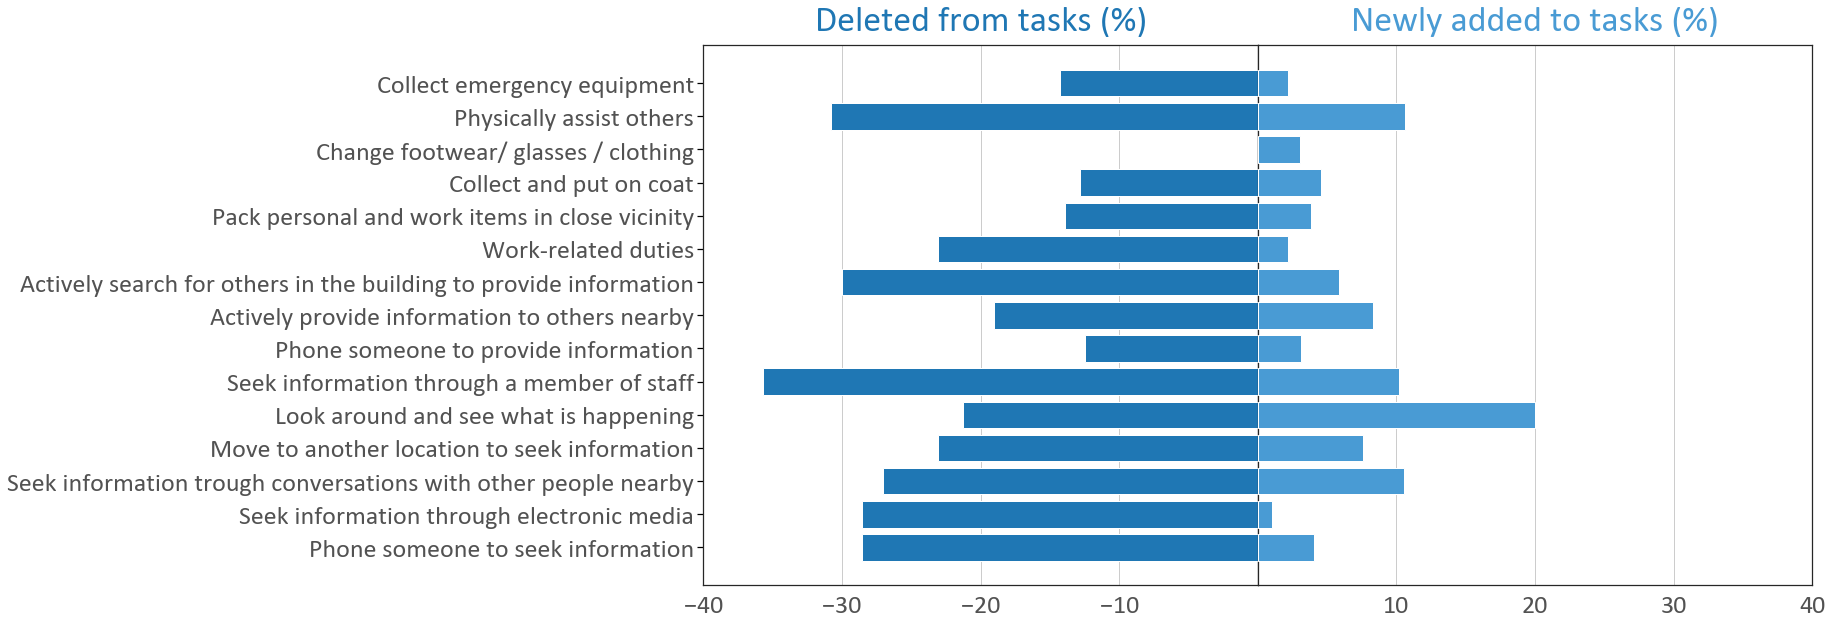

In [23]:

%matplotlib inline
data= Staff_dataframe_adjust [Staff_dataframe_adjust["Nationality"] == "Czech"]
data = data[['TaskType',"PercentageStaffNot",'PercentageStaffyes']]
data.set_index('TaskType', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = '#1f77b4'
color_blue = '#499BD4'

index = data.index
column0 = data['PercentageStaffNot']
column1 = data['PercentageStaffyes']

title0 = 'Deleted from tasks (%)'
title1 = 'Newly added to tasks (%)'

fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=36, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=36, pad=15, color=color_blue, **hfont)

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[1].set_xticks([10, 20, 30, 40])
axes[1].grid (axis = 'x')
axes[0].set_xticks([-10, -20, -30, -40])
axes[0].grid (axis = 'x')

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)


for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)


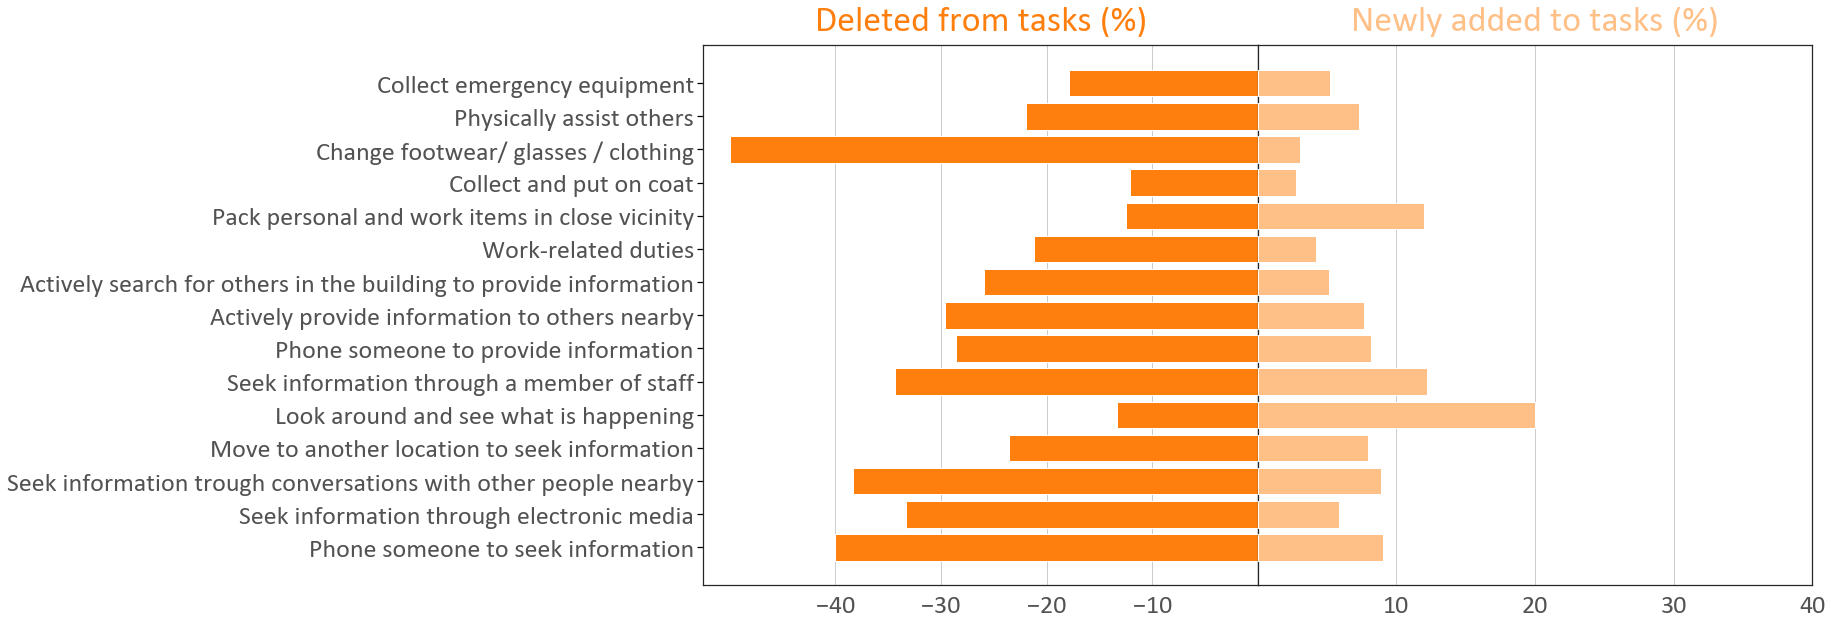

In [24]:
data= Staff_dataframe_adjust [Staff_dataframe_adjust["Nationality"] == "Polish"]
data = data[['TaskType',"PercentageStaffNot",'PercentageStaffyes']]
data.set_index('TaskType', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = '#ff7f0e'
color_blue = '#FFC088'

index = data.index
column0 = data['PercentageStaffNot']
column1 = data['PercentageStaffyes']

title0 = 'Deleted from tasks (%)'
title1 = 'Newly added to tasks (%)'
fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=36, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=36, pad=15, color=color_blue, **hfont)

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[1].set_xticks([10, 20, 30, 40])
axes[1].grid (axis = 'x')
axes[0].set_xticks([-10, -20, -30, -40])
axes[0].grid (axis = 'x')

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)


for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)


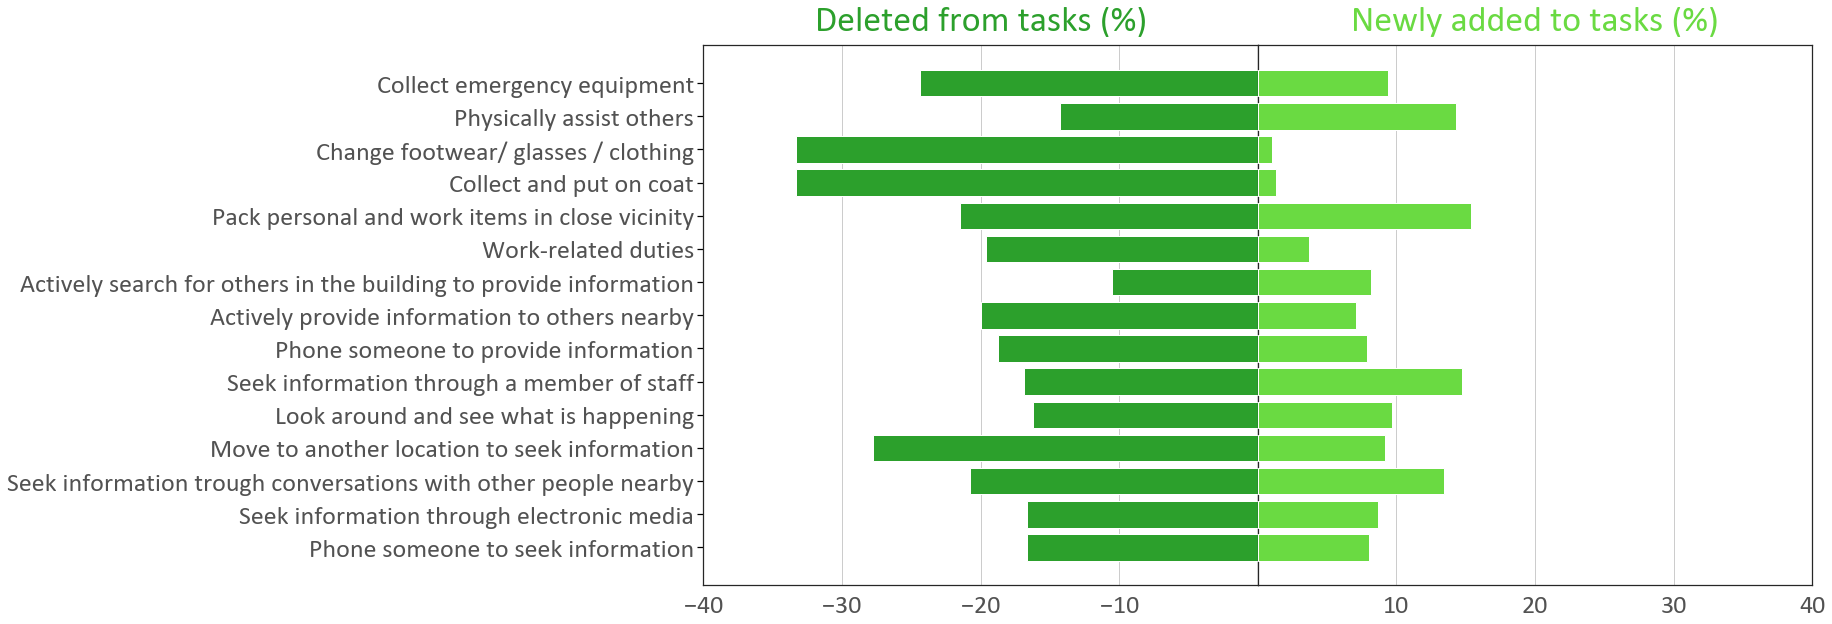

In [25]:
import matplotlib as mpl
data= Staff_dataframe_adjust [Staff_dataframe_adjust["Nationality"] == "Turkish"]
data = data[['TaskType',"PercentageStaffNot",'PercentageStaffyes']]
data.set_index('TaskType', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = '#2ca02c'
color_blue = '#6ADA42'

index = data.index
column0 = data['PercentageStaffNot']
column1 = data['PercentageStaffyes']

title0 = 'Deleted from tasks (%)'
title1 = 'Newly added to tasks (%)'

fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=36, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=36, pad=15, color=color_blue, **hfont)

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[1].set_xticks([10, 20, 30, 40])
axes[1].grid (axis = 'x')
axes[0].set_xticks([-10, -20, -30, -40])
axes[0].grid (axis = 'x')

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)


for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

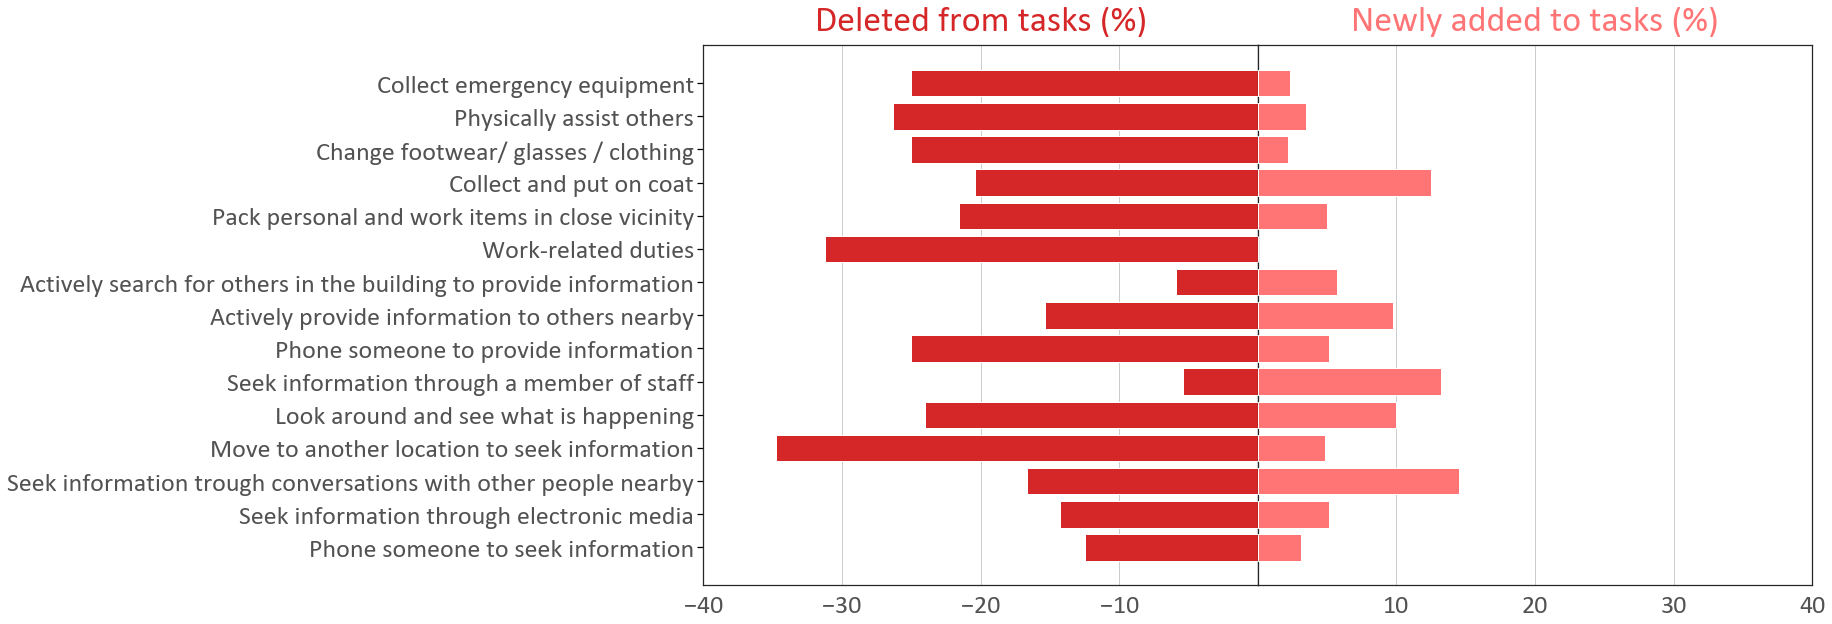

In [26]:
import matplotlib as mpl
data= Staff_dataframe_adjust [Staff_dataframe_adjust["Nationality"] == "UK"]
data = data[['TaskType',"PercentageStaffNot",'PercentageStaffyes']]
data.set_index('TaskType', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = '#d62728'
color_blue = '#FF7475'

index = data.index
column0 = data['PercentageStaffNot']
column1 = data['PercentageStaffyes']

title0 = 'Deleted from tasks (%)'
title1 = 'Newly added to tasks (%)'

fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=36, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=36, pad=15, color=color_blue, **hfont)

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[1].set_xticks([10, 20, 30, 40])
axes[1].grid (axis = 'x')
axes[0].set_xticks([-10, -20, -30, -40])
axes[0].grid (axis = 'x')

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)


for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)


In [27]:

# create excel writer object
#writer = pd.ExcelWriter('StaffAdjust.xls')
# write dataframe to excel
#Staff_dataframe_adjust.to_excel(writer)
# save the excel
#writer.save()

# Task adjustment after seeing fire
## Preparation

In [28]:
## Chance adjustments of tasks after fire-seen

All_tasks_list_Fire = ['Info_PhoneSeekInfo','Info_ElectronicMedia', 'Info_ConversationsNearbySeekInfo', 'info_ScanEnvironment', 'Info_StaffSeekInfo',
                  'info_OtherLocationSeekInfo', 'Info_PhoneProvideInfo', 'Info_ProvideInstructionsNearby',  'Info_ProvideInstructionsActiveSearch',
                  'Action_ShutDownWorkstation','Action_PackItems','Action_Coat', 'Action_FootwearGlassesClothing',
                  'Action_PhysicallyAssist','Action_EmergencyEquipment', 'Fire_FightFire', 'Fire_CallAlarmNumber' ]

Fire_dataframe_adjust = pd.DataFrame(columns=['TaskType', 'Scenario', 'Frequency_basic', 'Frequency_Fire_not','PercentageFireNot', 'Frequency_Fire_yes', 'PercentageFireyes'   ])

All_tasks= [ 'Basic_Info_PhoneSeekInfo', 'Basic_Info_ElectronicMedia', 'Basic_Info_ConversationsNearbySeekInfo',
           'Basic_info_OtherLocationSeekInfo', 'Basic_info_ScanEnvironment',
            'Basic_Info_StaffSeekInfo', 'Basic_Info_PhoneProvideInfo', 'Basic_Info_ProvideInstructionsNearby', 'Basic_Info_ProvideInstructionsActiveSearch',
            'Basic_Action_ShutDownWorkstation', 'Basic_Action_PackItems',
            'Basic_Action_Coat', 'Basic_Action_FootwearGlassesClothing', 'Basic_Action_PhysicallyAssist',
            'Basic_Action_EmergencyEquipment']

All_tasks_Fire= [ 'Basic_Info_PhoneSeekInfo', 'Basic_Info_ElectronicMedia', 'Basic_Info_ConversationsNearbySeekInfo',
           'Basic_info_OtherLocationSeekInfo', 'Basic_info_ScanEnvironment',
            'Basic_Info_StaffSeekInfo', 'Basic_Info_PhoneProvideInfo', 'Basic_Info_ProvideInstructionsNearby', 'Basic_Info_ProvideInstructionsActiveSearch',
            'Basic_Action_ShutDownWorkstation', 'Basic_Action_PackItems',
            'Basic_Action_Coat', 'Basic_Action_FootwearGlassesClothing', 'Basic_Action_PhysicallyAssist',
            'Basic_Action_EmergencyEquipment' ]

Tasks_Dictionary_Fire = {'Sequence_Fire_Info_PhoneSeekInfo' : 'Info_PhoneSeekInfo', 'Sequence_Fire_Info_ElectronicMedia': 'Info_ElectronicMedia', 'Sequence_Fire_Info_ConversationsNearbySeekInfo': 'Info_ConversationsNearbySeekInfo', 
           'Sequence_Fire_info_ScanEnvironment': 'info_ScanEnvironment', 'Sequence_Fire_Info_StaffSeekInfo': 'Info_StaffSeekInfo', 'Sequence_Fire_info_OtherLocationSeekInfo\t': 'info_OtherLocationSeekInfo',
            'Sequence_Fire_Info_PhoneProvideInfo': 'Info_PhoneProvideInfo', 'Sequence_Fire_Info_ProvideInstructionsNearby': 'Info_ProvideInstructionsNearby',
                    'Sequence_Fire_Info_ProvideInstructionsActiveSearch': 'Info_ProvideInstructionsActiveSearch',
           'Sequence_Fire_Action_ShutDownWorkstation': 'Action_ShutDownWorkstation', 'Sequence_Fire_Action_PackItems': 'Action_PackItems', 'Sequence_Fire_Action_Coat': 'Action_Coat',
                    'Sequence_Fire_Action_FootwearGlassesClothing': 'Action_FootwearGlassesClothing','Sequence_Fire_Action_PhysicallyAssist': 'Action_PhysicallyAssist',
                    'Sequence_Fire_Action_EmergencyEquipment': 'Action_EmergencyEquipment',  'Sequence_Fire_CallAlarmNumber':'CallAlarmNumber', 'Sequence_Fire_FightFire': 'FightFire'  }


All_tasks_Fire_Not_dict= { 'Basic_Info_PhoneSeekInfo':"Fire_Not_Info_PhoneSeekInfo" , 'Basic_Info_ElectronicMedia':"Fire_Not_Info_ElectronicMedia" ,
                           'Basic_Info_ConversationsNearbySeekInfo':"Fire_Not_Info_ConversationsNearbySeekInfo" ,
                           'Basic_info_OtherLocationSeekInfo':'Fire_Not_info_OtherLocationSeekInfo' , 'Basic_info_ScanEnvironment':"Fire_Not_info_ScanEnvironment" ,
                            'Basic_Info_StaffSeekInfo':"Fire_Not_Info_StaffSeekInfo" , 'Basic_Info_PhoneProvideInfo': "Fire_Not_Info_PhoneProvideInfo", 'Basic_Info_ProvideInstructionsNearby':"Fire_Not_Info_ProvideInstructionsNearby" ,
                           'Basic_Info_ProvideInstructionsActiveSearch': "Fire_Not_Info_ProvideInstructionsActiveSearch", 'Basic_Action_ShutDownWorkstation':"Fire_Not_Action_ShutDownWorkstation" , 'Basic_Action_PackItems': 'Fire_Not_Action_PackItems',
                           'Basic_Action_Coat':"Fire_Not_Action_Coat" , 'Basic_Action_FootwearGlassesClothing':"Fire_Not_Action_FootwearGlassesClothing" , 'Basic_Action_PhysicallyAssist':  "Fire_Not_Action_PhysicallyAssist",
                           'Basic_Action_EmergencyEquipment': "Fire_Not_Action_EmergencyEquipment"}

All_tasks_Fire_Yes_dict= { 'Basic_Info_PhoneSeekInfo':"Fire_Yes_Info_PhoneSeekInfo" , 'Basic_Info_ElectronicMedia':"Fire_Yes_Info_ElectronicMedia" ,
                           'Basic_Info_ConversationsNearbySeekInfo':"Fire_Yes_Info_ConversationsNearbySeekInfo" ,
                           'Basic_info_OtherLocationSeekInfo':'Fire_Yes_info_OtherLocationSeekInfo' , 'Basic_info_ScanEnvironment':"Fire_Yes_info_ScanEnvironment" ,
                            'Basic_Info_StaffSeekInfo':"Fire_Yes_Info_StaffSeekInfo" , 'Basic_Info_PhoneProvideInfo': "Fire_Yes_Info_PhoneProvideInfo", 'Basic_Info_ProvideInstructionsNearby':"Fire_Yes_Info_ProvideInstructionsNearby" ,
                           'Basic_Info_ProvideInstructionsActiveSearch': "Fire_Yes_Info_ProvideInstructionsActiveSearch", 'Basic_Action_ShutDownWorkstation':"Fire_Yes_Action_ShutDownWorkstation" , 'Basic_Action_PackItems': 'Fire_Yes_Action_PackItems',
                           'Basic_Action_Coat':"Fire_Yes_Action_Coat" , 'Basic_Action_FootwearGlassesClothing':"Fire_Yes_Action_FootwearGlassesClothing" , 'Basic_Action_PhysicallyAssist':  "Fire_Yes_Action_PhysicallyAssist",
                           'Basic_Action_EmergencyEquipment': "Fire_Yes_Action_EmergencyEquipment"}



Tasks_Dictionary_Basic = {'Basic_Info_PhoneSeekInfo' : 'Info_PhoneSeekInfo', 'Basic_Info_ElectronicMedia': 'Info_ElectronicMedia', 'Basic_Info_ConversationsNearbySeekInfo': 'Info_ConversationsNearbySeekInfo', 
           'Basic_info_ScanEnvironment': 'info_ScanEnvironment', 'Basic_Info_StaffSeekInfo': 'Info_staffSeekInfo', 'Basic_info_OtherLocationSeekInfo': 'info_OtherLocationSeekInfo',
            'Basic_Info_PhoneProvideInfo': 'Info_PhoneProvideInfo', 'Basic_Info_ProvideInstructionsNearby': 'Info_ProvideInstructionsNearby',
                    'Basic_Info_ProvideInstructionsActiveSearch': 'Info_ProvideInstructionsActiveSearch',
           'Basic_Action_ShutDownWorkstation': 'Action_ShutDownWorkstation', 'Basic_Action_PackItems': 'Action_PackItems', 'Basic_Action_Coat': 'Action_Coat',
                    'Basic_Action_FootwearGlassesClothing': 'Action_FootwearGlassesClothing','Basic_Action_PhysicallyAssist': 'Action_PhysicallyAssist',
                    'Basic_Action_EmergencyEquipment': 'Action_EmergencyEquipment'}

All_Datasets= [df_cz, df_pl, df_tu, df_uk  ]

for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in All_tasks_Fire:
 
        frequency_basic = y[i].sum()
        frequency_Fire_not = y[All_tasks_Fire_Not_dict[i]].sum()
        frequency_Fire_yes = y[All_tasks_Fire_Yes_dict[i]].sum()
        percentage_Fire_not = round (frequency_Fire_not / frequency_basic * 100, 2)
        percentage_Fire_yes = round (frequency_Fire_yes / (105-frequency_basic) * 100, 2)

        
        
        Fire_dataframe_adjust  = Fire_dataframe_adjust .append({'TaskType': All_tasks_dictionary[Tasks_Dictionary_Basic[i]], 'Nationality': Nationality2, 'Frequency_basic': frequency_basic,
                                                                'Frequency_Fire_not': frequency_Fire_not,'PercentageFireNot': -percentage_Fire_not,'Frequency_Fire_yes': frequency_Fire_yes,'PercentageFireyes': percentage_Fire_yes, 'Scenario': 'Fire',}, ignore_index=True)
# Call alarm number, and fight fire were not included previously. Thus these need to be added
listoftwo=[ 'Sequence_Fire_CallAlarmNumber', 'Sequence_Fire_FightFire']
listoftwodictionary= {"Sequence_Fire_CallAlarmNumber": "Call Alarm number", 'Sequence_Fire_FightFire': "Fight fire" }
for y in All_Datasets: 
    Nationality2 = y.iloc[1]["Nationality"]
        
    for i in listoftwo:
 
        frequency_basic = 0
        frequency_Fire_not = 0
        frequency_Fire_yes = y[i].count()
        percentage_Fire_not = 0
        percentage_Fire_yes = round (frequency_Fire_yes / (105) * 100, 2)

        
        
        Fire_dataframe_adjust  = Fire_dataframe_adjust .append({'TaskType': listoftwodictionary[i], 'Nationality': Nationality2, 'Frequency_basic': frequency_basic,
                                                                'Frequency_Fire_not': frequency_Fire_not,'PercentageFireNot': -percentage_Fire_not,'Frequency_Fire_yes': frequency_Fire_yes,'PercentageFireyes': percentage_Fire_yes, 'Scenario': 'Fire',}, ignore_index=True)

## Plots

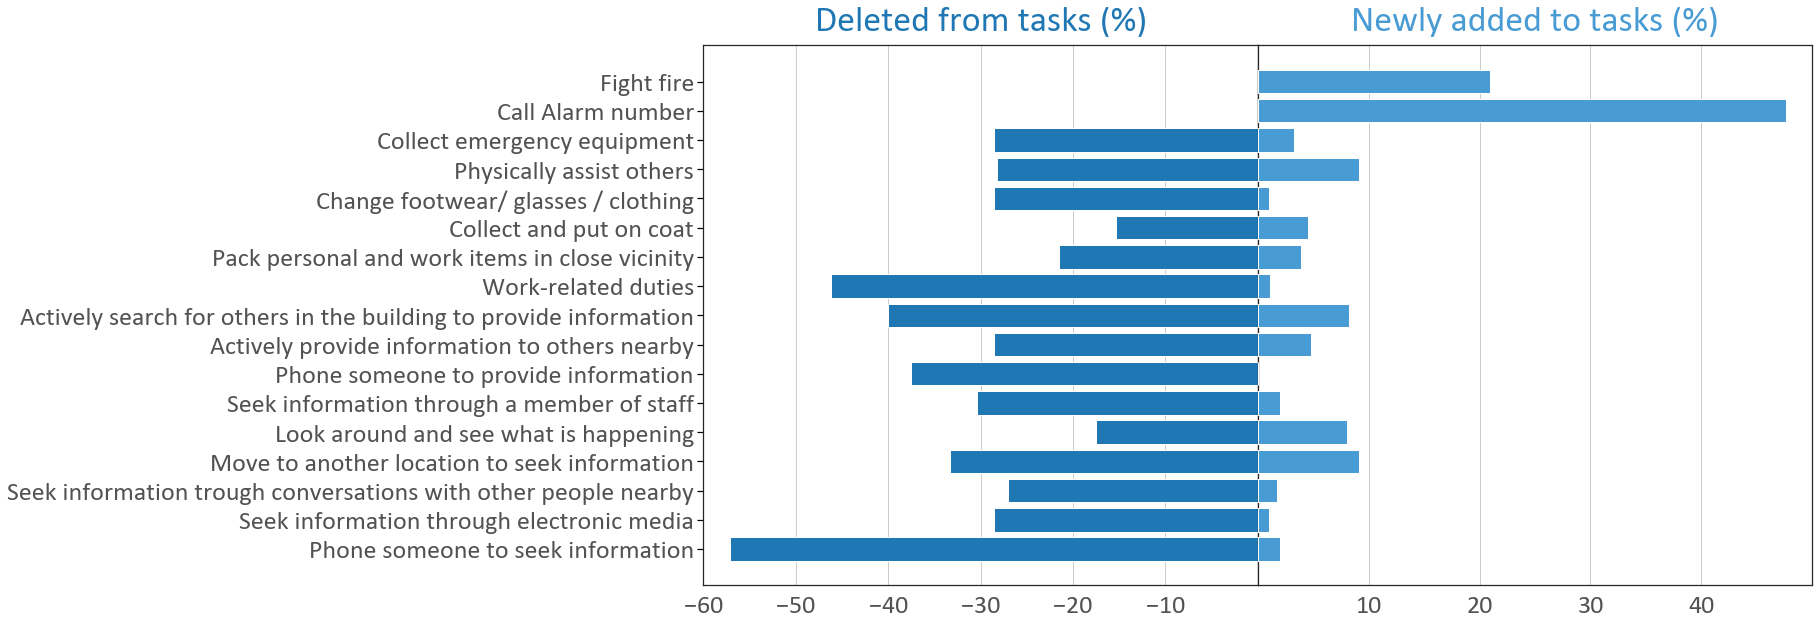

In [29]:
%matplotlib inline
data= Fire_dataframe_adjust [Fire_dataframe_adjust["Nationality"] == "Czech"]
data = data[['TaskType',"PercentageFireNot",'PercentageFireyes']]
data.set_index('TaskType', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = '#1f77b4'
color_blue = '#499BD4'

index = data.index
column0 = data['PercentageFireNot']
column1 = data['PercentageFireyes']

title0 = 'Deleted from tasks (%)'
title1 = 'Newly added to tasks (%)'

fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=36, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=36, pad=15, color=color_blue, **hfont)

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[1].set_xticks([10, 20, 30, 40])
axes[1].grid (axis = 'x')
axes[0].set_xticks([-10, -20, -30, -40, -50, -60])
axes[0].grid (axis = 'x')

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)


for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
#plt.savefig("AdjustFireCzech.png", dpi=300)

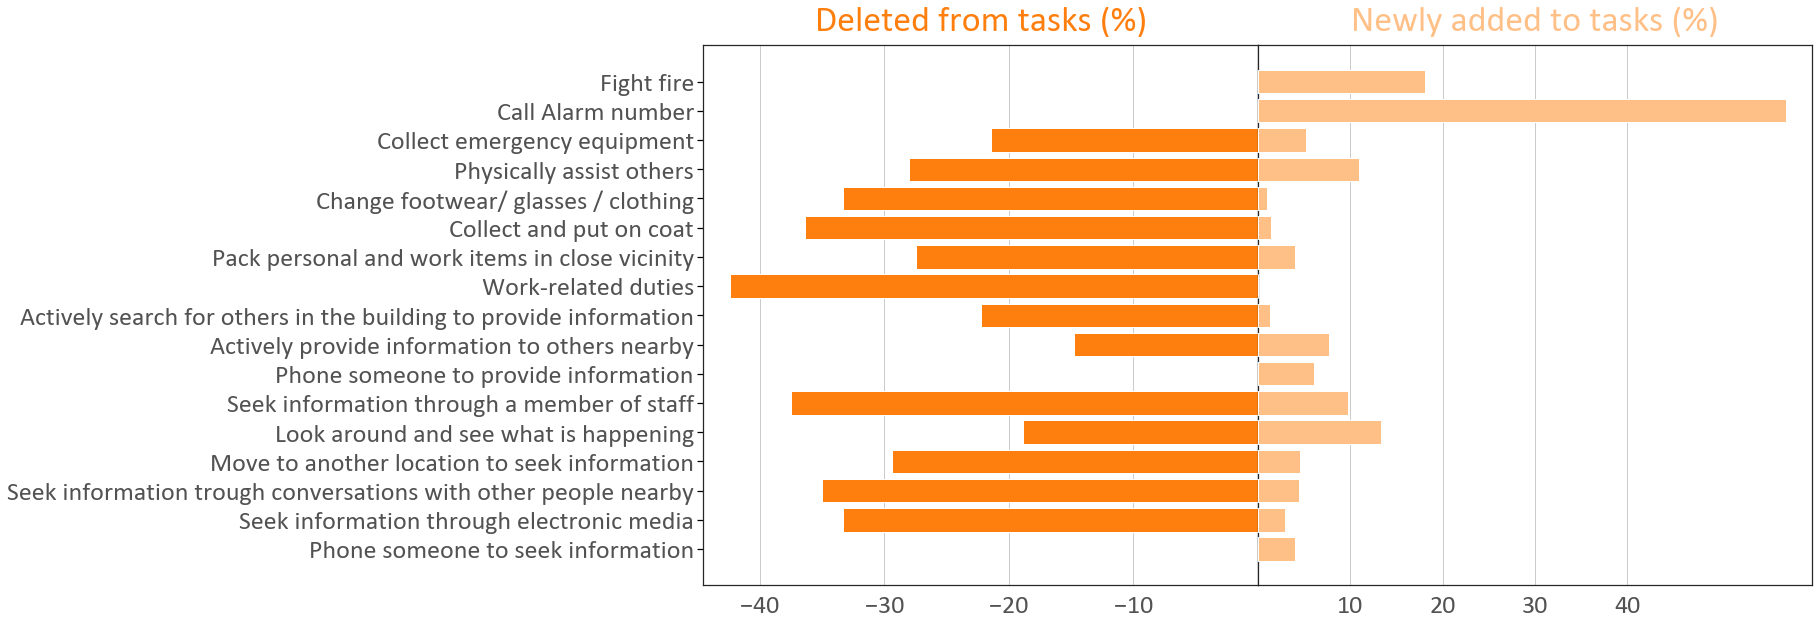

In [30]:
import matplotlib as mpl
%matplotlib inline
data= Fire_dataframe_adjust [Fire_dataframe_adjust["Nationality"] == "Polish"]
data = data[['TaskType',"PercentageFireNot",'PercentageFireyes']]
data.set_index('TaskType', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = '#ff7f0e'
color_blue = '#FFC088'

index = data.index
column0 = data['PercentageFireNot']
column1 = data['PercentageFireyes']

title0 = 'Deleted from tasks (%)'
title1 = 'Newly added to tasks (%)'
fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=36, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=36, pad=15, color=color_blue, **hfont)

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[1].set_xticks([10, 20, 30, 40])
axes[1].grid (axis = 'x')
axes[0].set_xticks([-10, -20, -30, -40])
axes[0].grid (axis = 'x')

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)


for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
#plt.savefig("AdjustFirePolish.png", dpi=300)

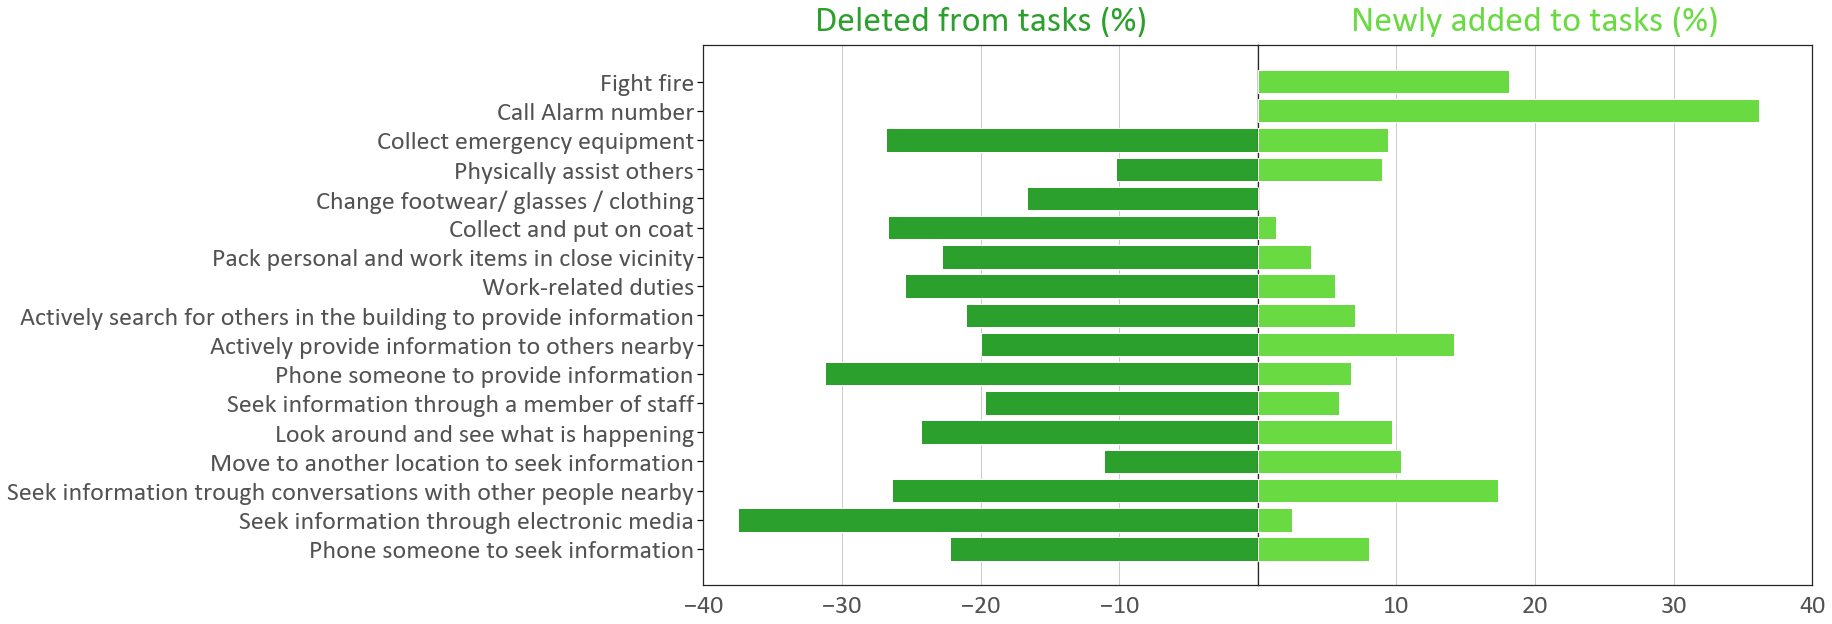

In [31]:
import matplotlib as mpl
%matplotlib inline
data= Fire_dataframe_adjust [Fire_dataframe_adjust["Nationality"] == "Turkish"]
data = data[['TaskType',"PercentageFireNot",'PercentageFireyes']]
data.set_index('TaskType', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'


color_red = '#2ca02c'
color_blue = '#6ADA42'

index = data.index
column0 = data['PercentageFireNot']
column1 = data['PercentageFireyes']

title0 = 'Deleted from tasks (%)'
title1 = 'Newly added to tasks (%)'

fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=36, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=36, pad=15, color=color_blue, **hfont)

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[1].set_xticks([10, 20, 30, 40])
axes[1].grid (axis = 'x')
axes[0].set_xticks([-10, -20, -30, -40])
axes[0].grid (axis = 'x')

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)


for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)



plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
#plt.savefig("AdjustFireTurk.png", dpi=300)

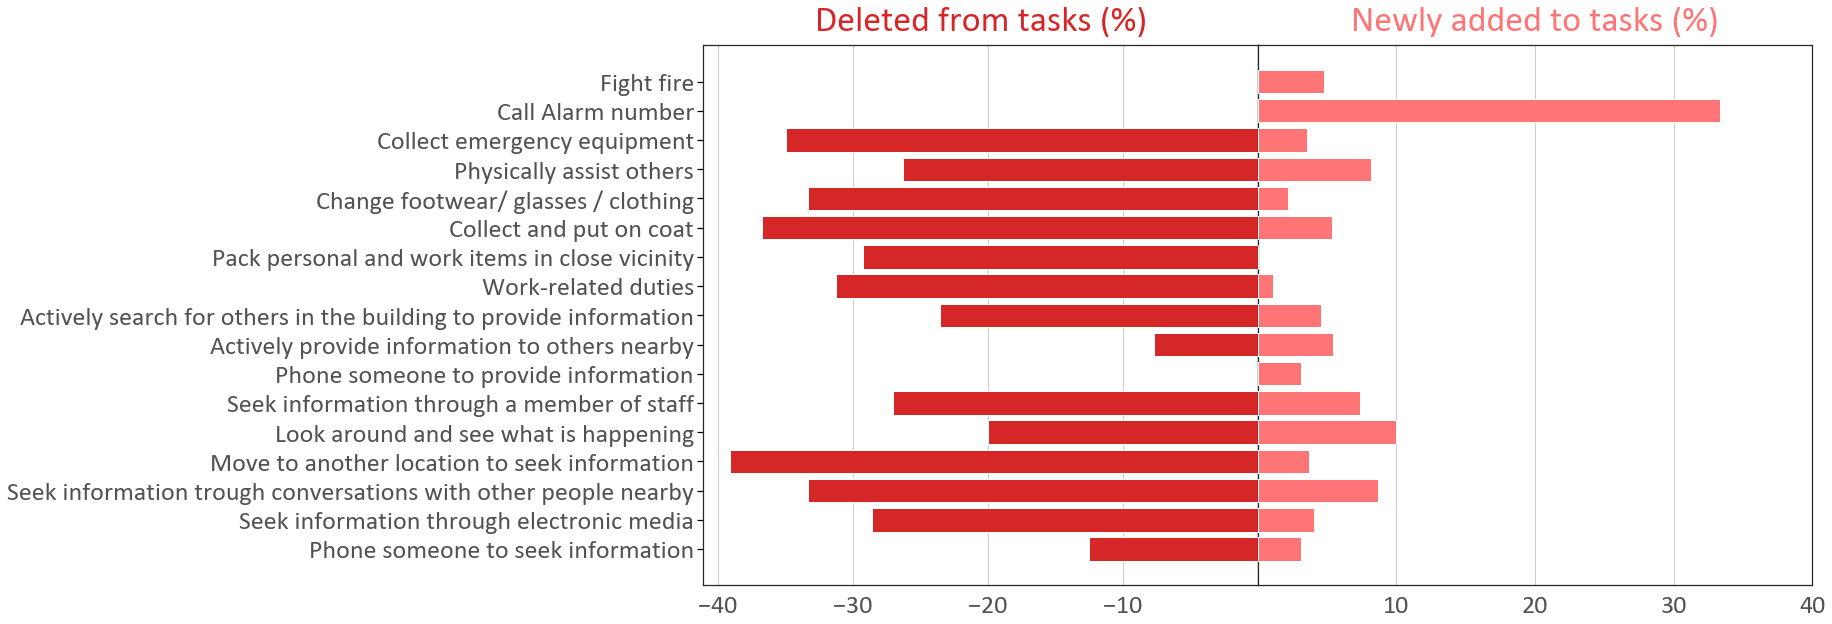

In [32]:
%matplotlib inline
data= Fire_dataframe_adjust [Fire_dataframe_adjust["Nationality"] == "UK"]
data = data[['TaskType',"PercentageFireNot",'PercentageFireyes']]
data.set_index('TaskType', inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_red = '#d62728'
color_blue = '#FF7475'

index = data.index
column0 = data['PercentageFireNot']
column1 = data['PercentageFireyes']

title0 = 'Deleted from tasks (%)'
title1 = 'Newly added to tasks (%)'

fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=36, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=36, pad=15, color=color_blue, **hfont)

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[1].set_xticks([10, 20, 30, 40])
axes[1].grid (axis = 'x')
axes[0].set_xticks([-10, -20, -30, -40])
axes[0].grid (axis = 'x')

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)


for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=26, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
#plt.savefig("AdjustFireUK.png", dpi=300)